In [2]:
import numpy as np
from scipy.io import readsav
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
cmap1 = plt.get_cmap('inferno')
indices = np.linspace(0, cmap1.N, 9)
my_colors1 = [cmap1(int(i)) for i in indices]
cmap2 = plt.get_cmap('viridis')
indices = np.linspace(0, cmap2.N, 9)
my_colors2 = [cmap2(int(i)) for i in indices]

In [4]:
data_dir = '/Users/pstar/EORanalysis/mwax_fhd/fhd_eor_latest_greatest_image_phase2_no_freq_av_no_freq_flag/ps/data/1d_binning/'

In [5]:
file_prefix = 'Combined_obs_mwax_1_full_cubeXX__even_odd_joint_noimgclip_'

In [6]:
file_suffix = '_dft_kzorigfreqs_averemove_swbh_dencorr_kperplambda10-50_kpar_power.idlsave'

In [7]:
freq_avg = ['flagzero_freqbincenter3_',
            'flagedge1asym_freqbincenter3_',
            'flagedge2asym_freqbincenter3_',
            'flagzero_freqbincenter5_', 
            'flagedge1asym_freqbincenter5_',
            'flagedge2asym_freqbincenter5_',
            'flagedge2asymtruncate_freqbincenter5acrossgap_',
            'flagedge2asym_freqbincenter5acrossgap_',
            'flagedge2_freqavg4_evenfreqs_',
            'flagedge2_freqavg4_',
            'flagedge3_freqavg4_evenfreqs_',
            'flagedge3_freqavg4_',
            'flagedge1truncate_freqbin8acrossgap_',
            'flagedge2truncate_freqbin8acrossgap_',
            'flagedge3truncate_freqbin8acrossgap_',
            'flagedge2asym_freqavg4_evenfreqs_']

In [8]:
def get_sav_data(data_dir, file_prefix, file_suffix, freq_avg, dtype, pol):
    data_dict={}
    for i in range(len(freq_avg)):
        data_dict[i] = readsav(data_dir + file_prefix + freq_avg[i] + dtype + '_' + pol + file_suffix)
    return data_dict

In [8]:
data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg[0:3], 'model', 'xx')

In [9]:
data_dict3[1].keys()

dict_keys(['power', 'noise', 'sim_noise', 'sim_noise_diff', 'weights', 'noise_expval', 'k_edges', 'k_bin', 'kperp_lambda_conv', 'delay_params', 'hubble_param', 'freq_mask', 'kperp_range', 'kperp_range_lambda', 'kx_range', 'kx_range_lambda', 'ky_range', 'ky_range_lambda', 'kpar_range', 'window_int', 'git_hashes', 'wt_ave_power', 'ave_power', 'ave_weights', 'wt_ave_power_freq', 'ave_power_freq', 'wt_ave_power_uvf', 'ave_power_uvf', 'uv_pix_area', 'uv_area'])

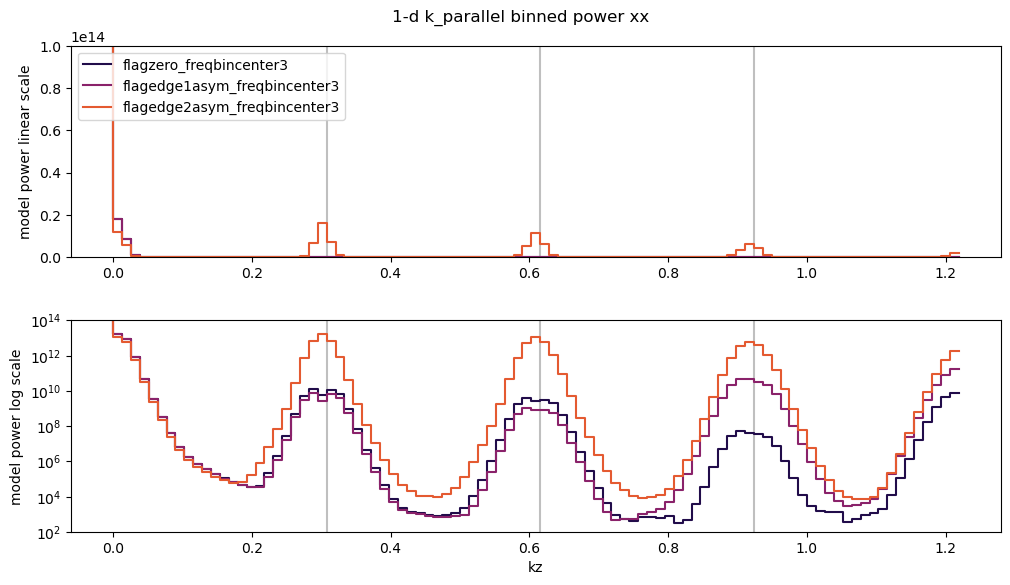

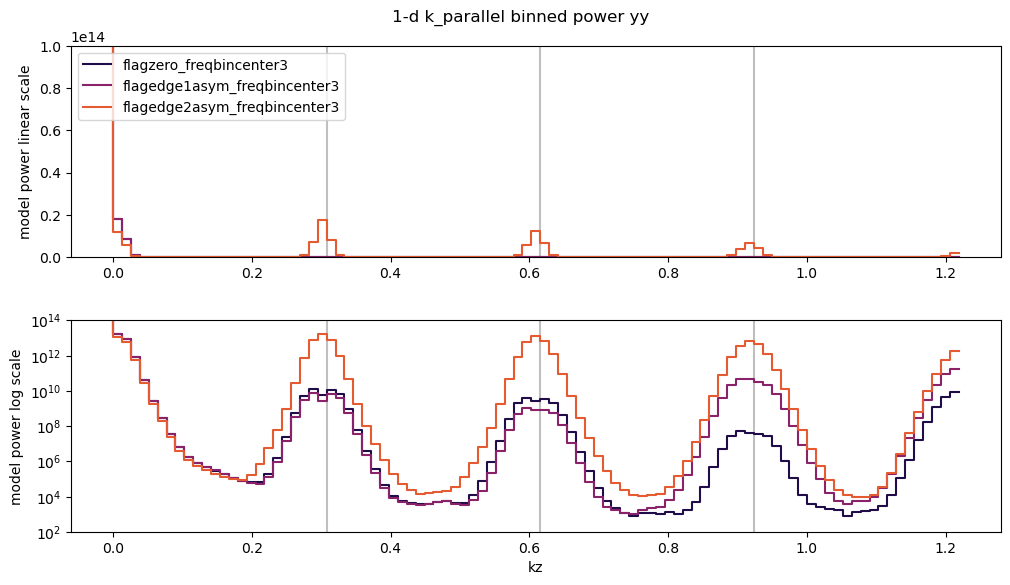

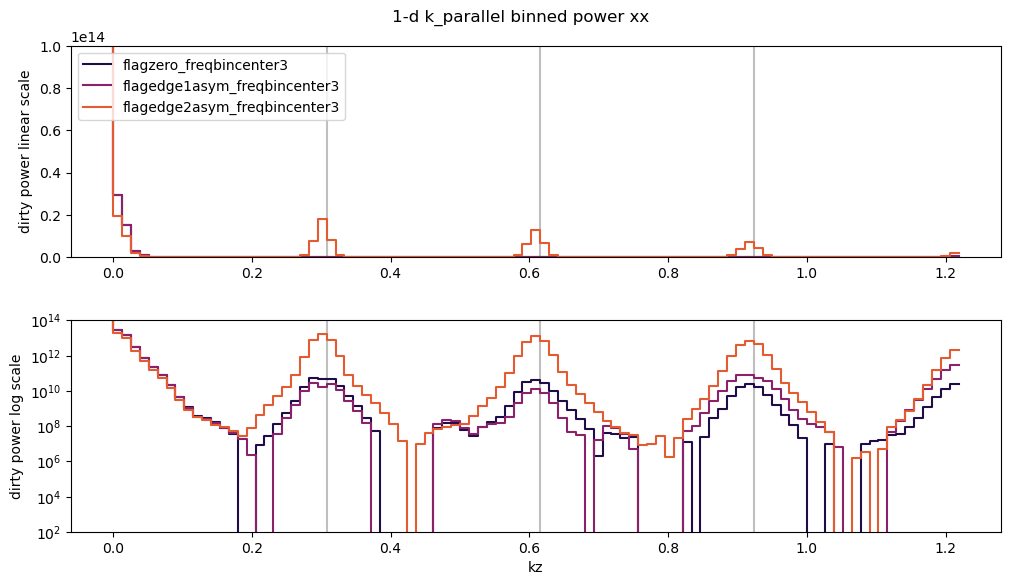

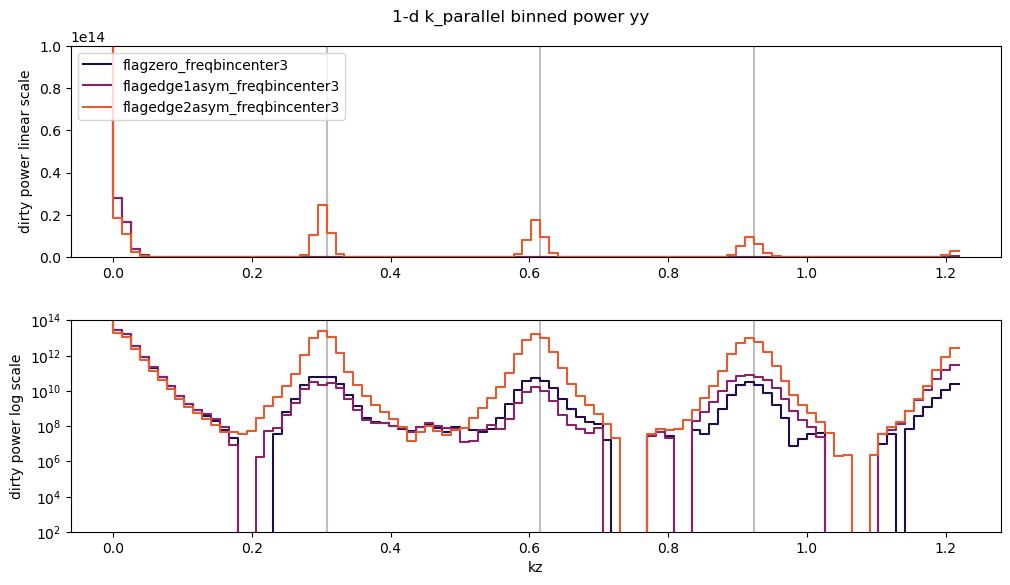

In [16]:
log_ylim = (1e2, 1e14)
cb_kz = [0.30785424,0.61570847,0.92356277]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg[0:3], i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, axes = plt.subplots(nrows = 2, figsize=(12, 6))
        ax = axes[0]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('linear')
        ax.set_ylabel(i + ' power linear scale')
        ax.legend(loc='upper left')
        ax = axes[1]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

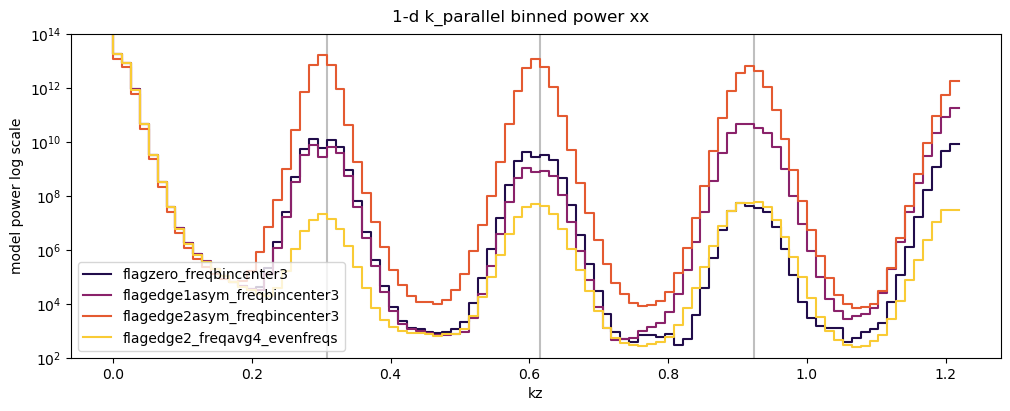

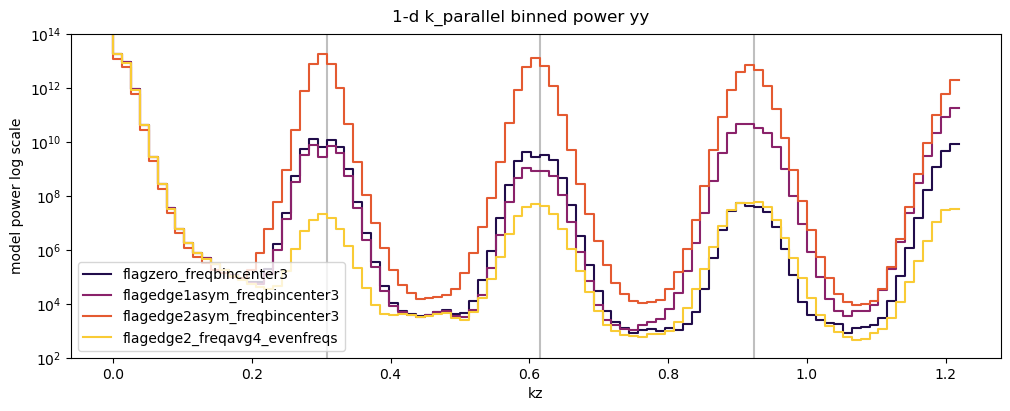

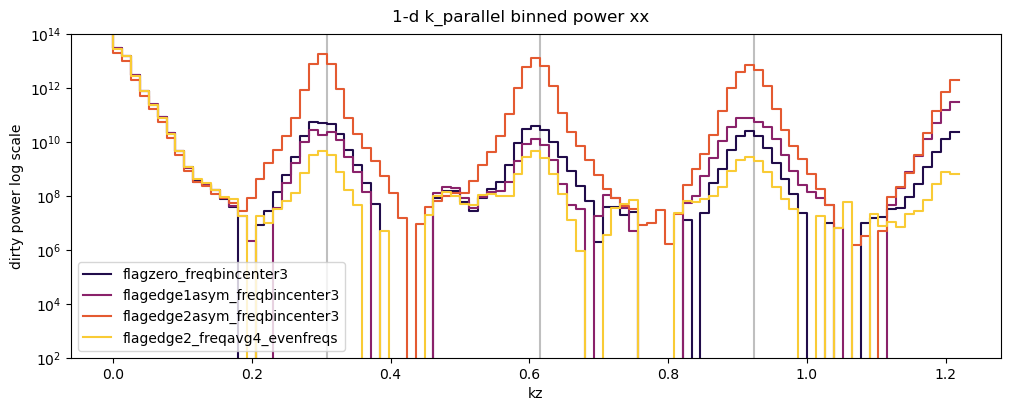

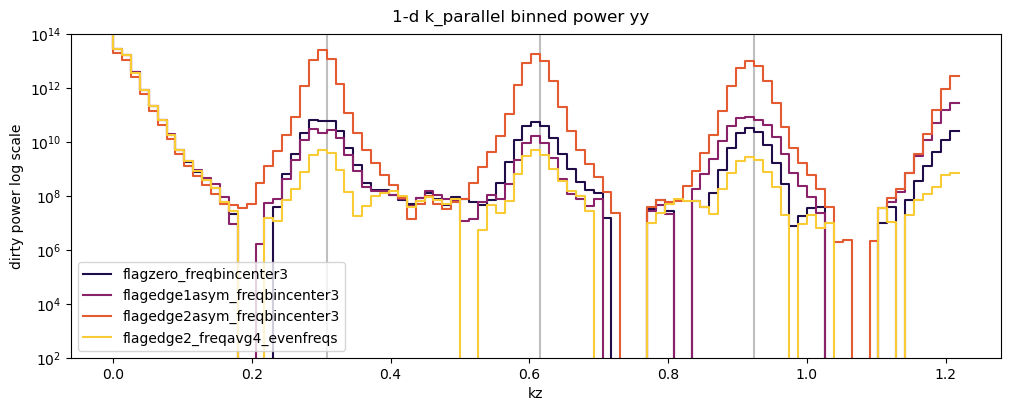

In [17]:
ylim = (10, 1e12)
log_ylim = (100, 1e14)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use=freq_avg[0:3] + [freq_avg[8]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, ax = plt.subplots(nrows = 1, figsize=(12, 4))
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        ax.legend(loc='lower left')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

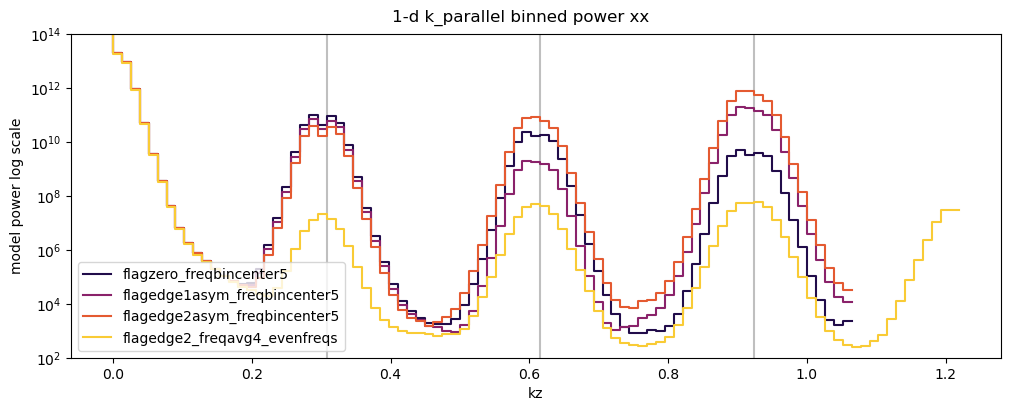

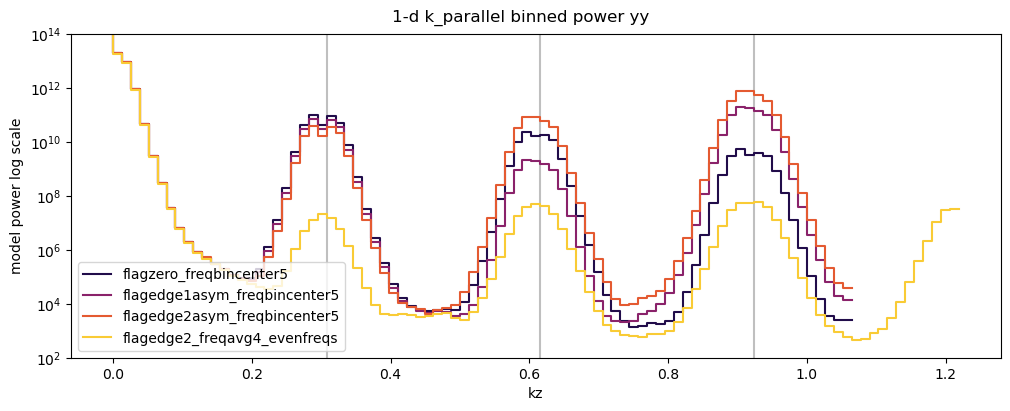

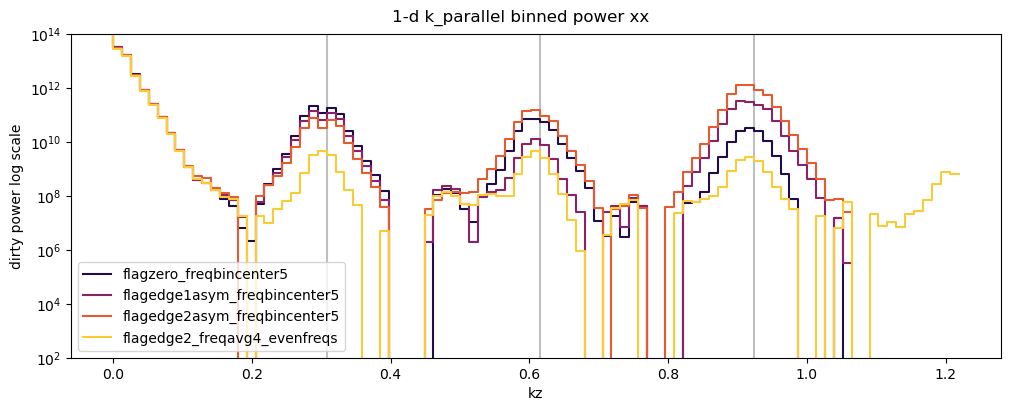

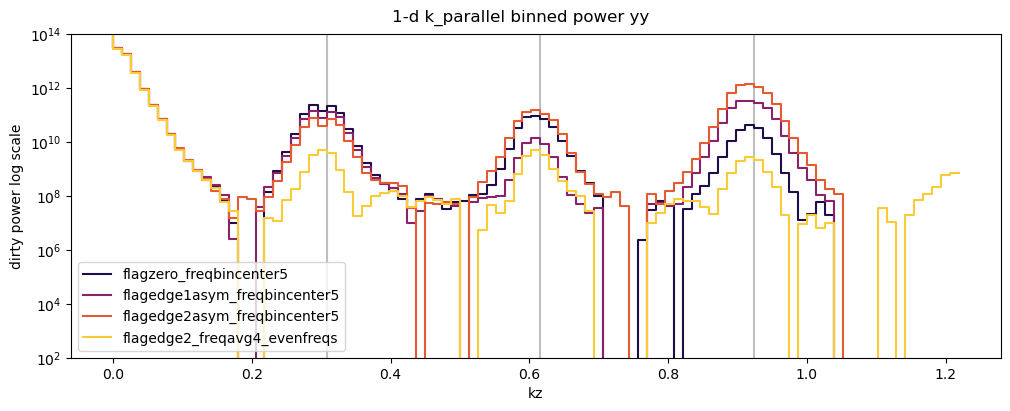

In [18]:
ylim = (10, 1e12)
log_ylim = (100, 1e14)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use=freq_avg[3:6] + [freq_avg[8]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, ax = plt.subplots(nrows = 1, figsize=(12, 4))
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            if k==3:
                ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
            else:
                ax.step(kz[:84], data_dict3[k].power[:84], label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        ax.legend(loc='lower left')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

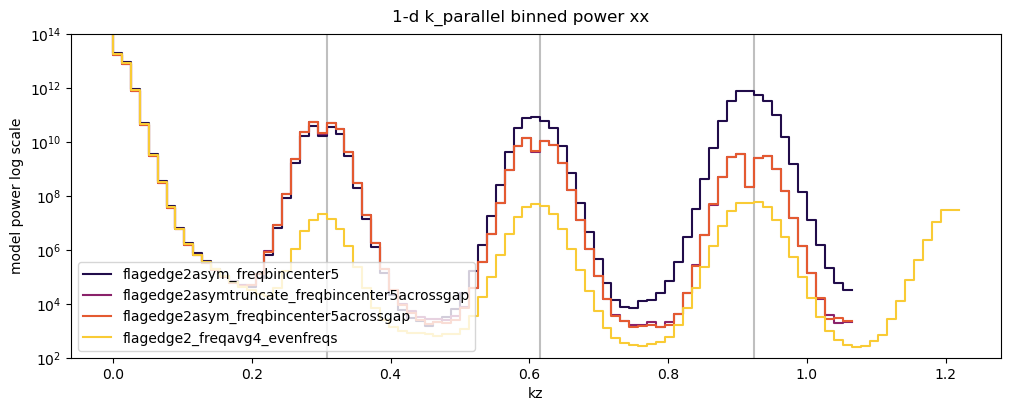

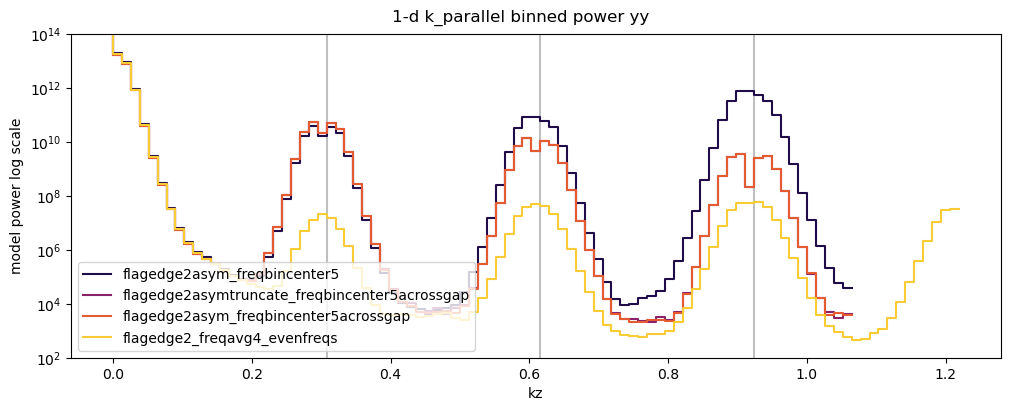

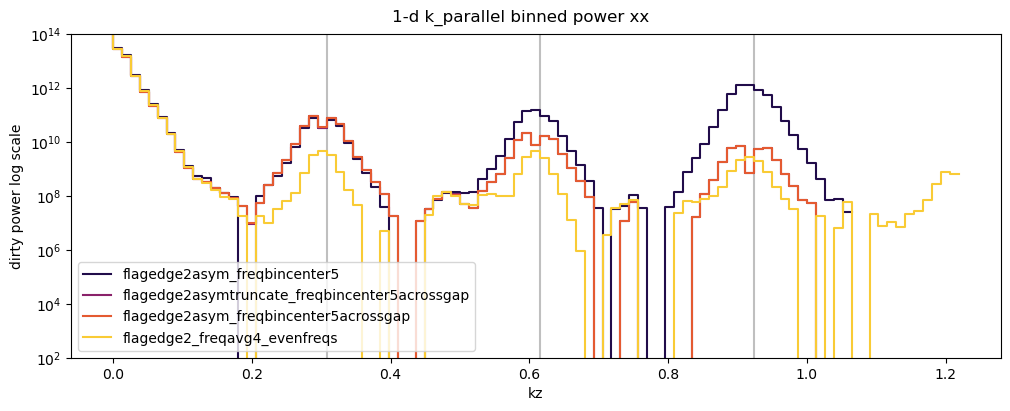

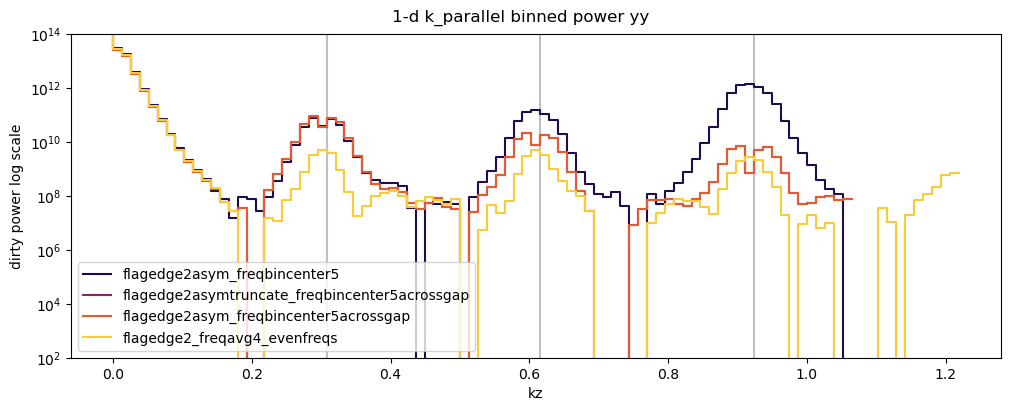

In [19]:
ylim = (10, 1e12)
log_ylim = (100, 1e14)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use=freq_avg[5:8] + [freq_avg[8]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, ax = plt.subplots(nrows = 1, figsize=(12, 4))
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            if k==3:
                ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
            else:
                ax.step(kz[:84], data_dict3[k].power[:84], label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        ax.legend(loc='lower left')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

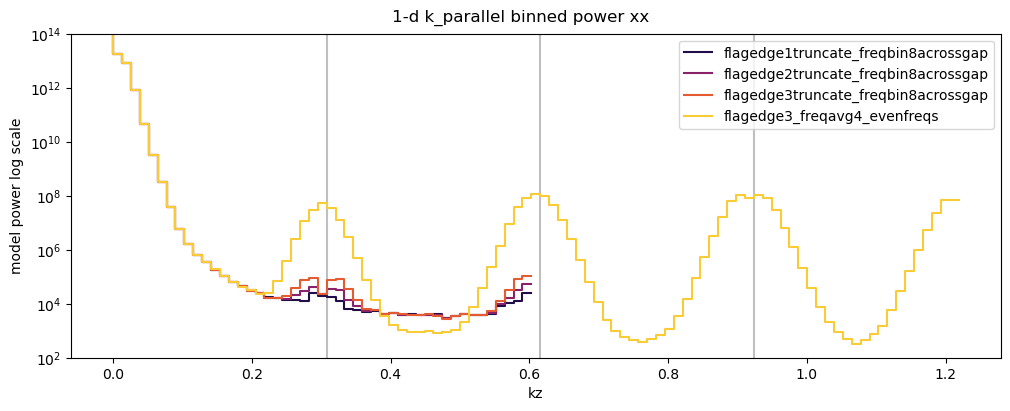

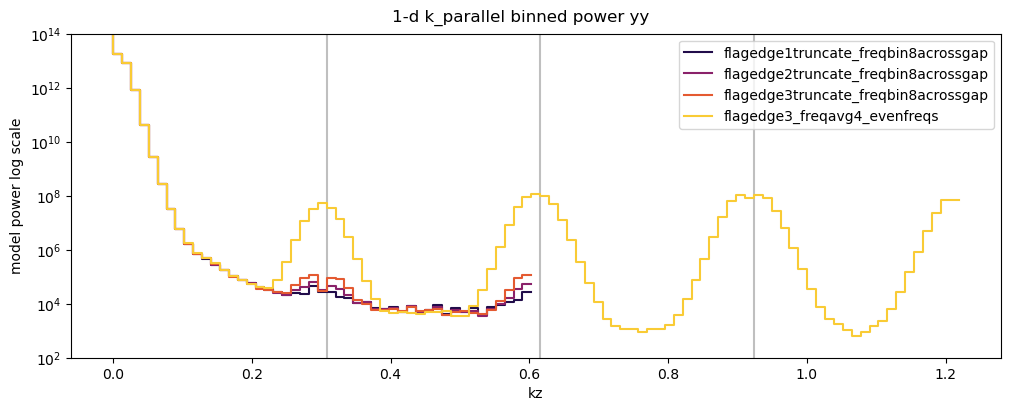

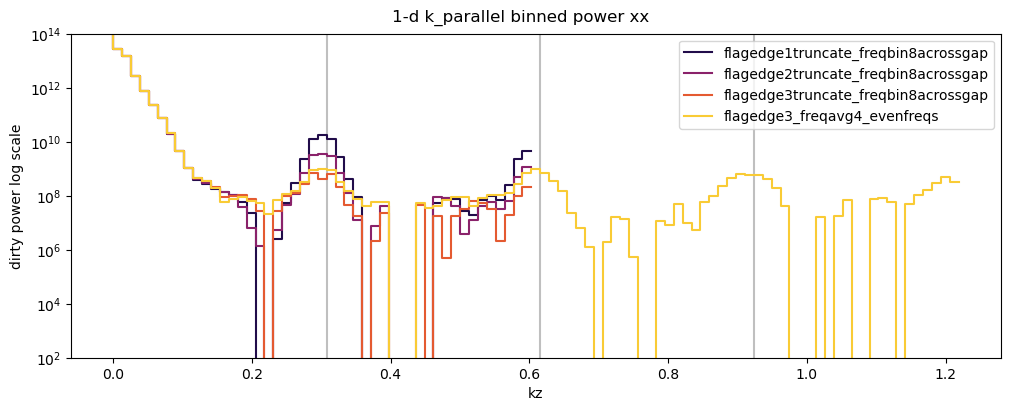

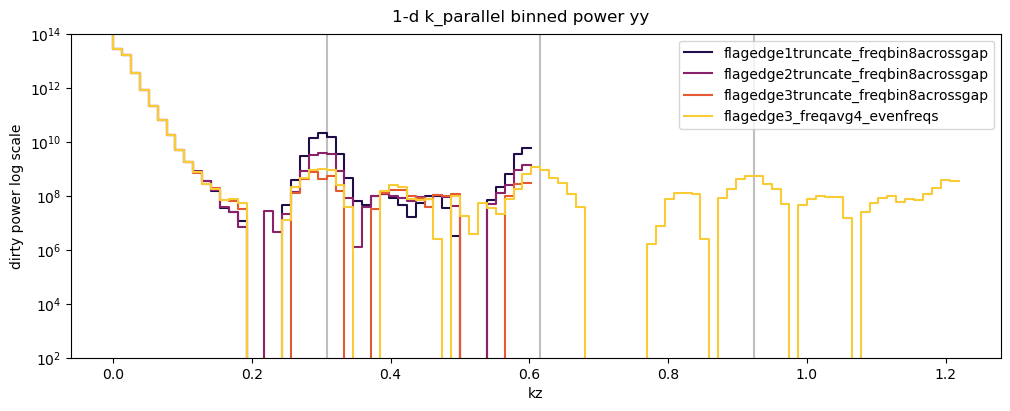

In [20]:
ylim = (10, 1e12)
log_ylim = (100, 1e14)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use=freq_avg[12:15] + [freq_avg[10]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, ax = plt.subplots(nrows = 1, figsize=(12, 4))
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            if k==3:
                ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
            else:
                ax.step(kz[:48], data_dict3[k].power[:48], label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        ax.legend(loc='upper right')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

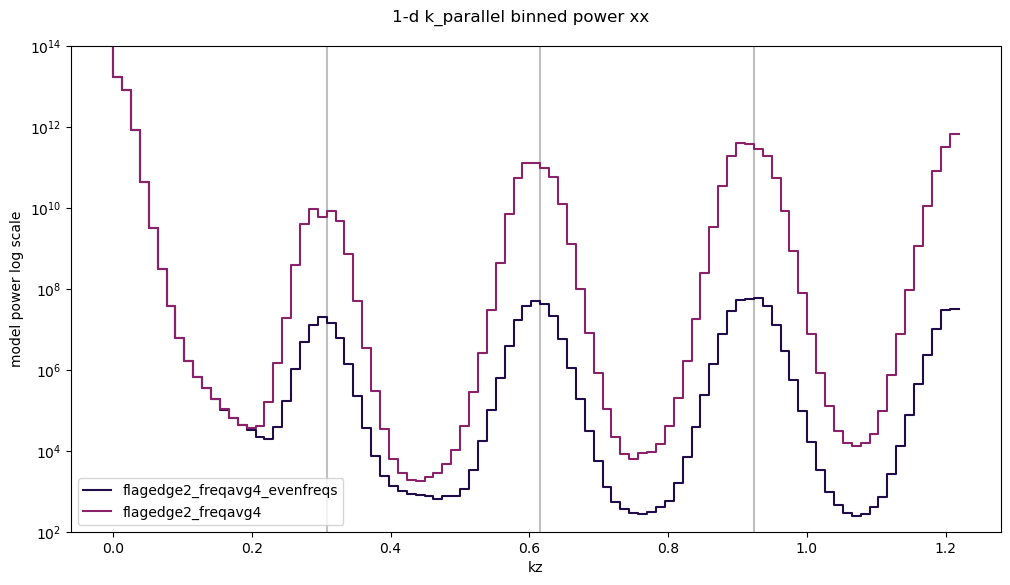

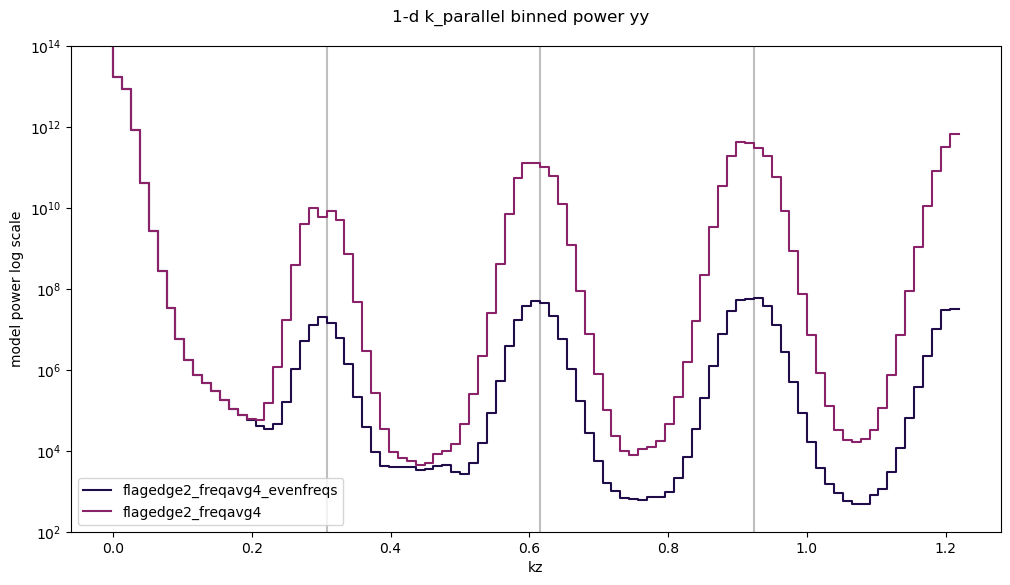

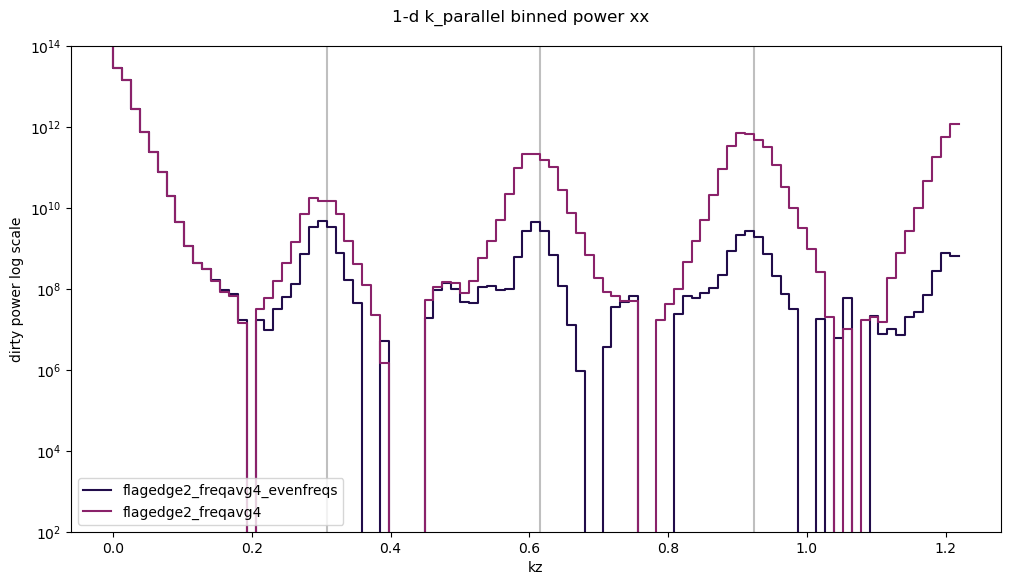

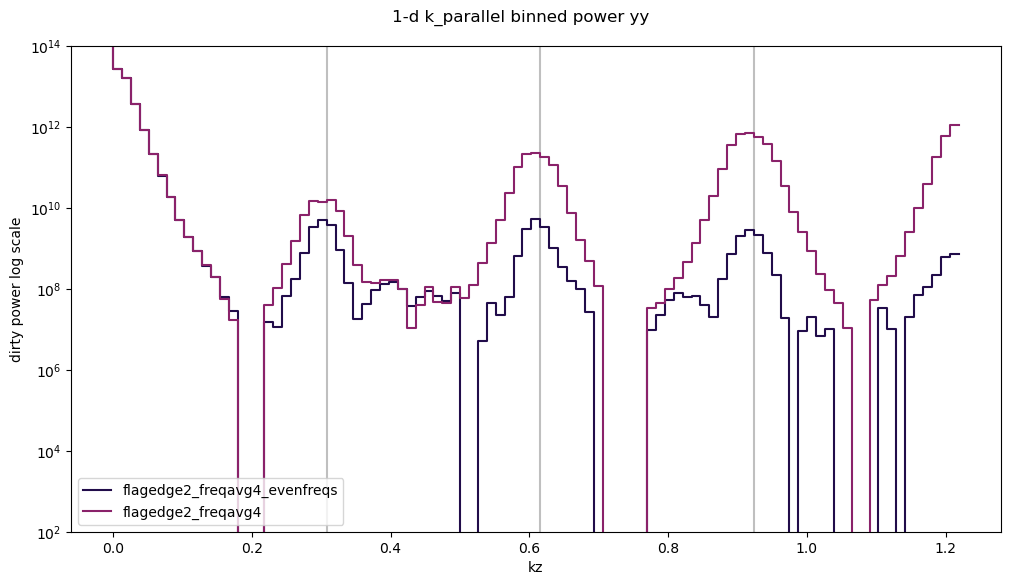

In [21]:
ylim = (10, 1e12)
log_ylim = (100, 1e14)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use=freq_avg[8:10]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, ax = plt.subplots(nrows = 1, figsize=(12, 6))
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        ax.legend(loc='lower left')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

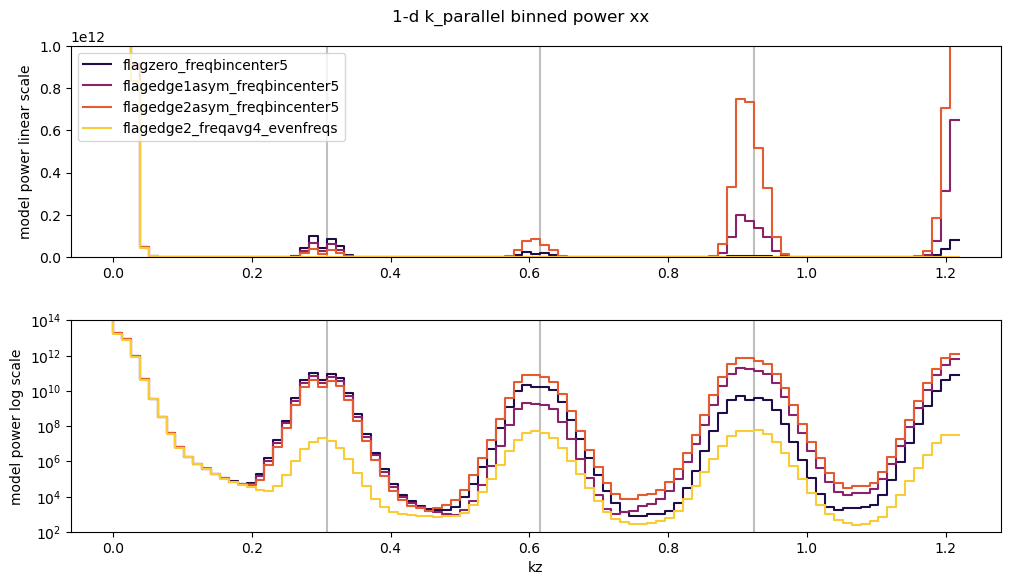

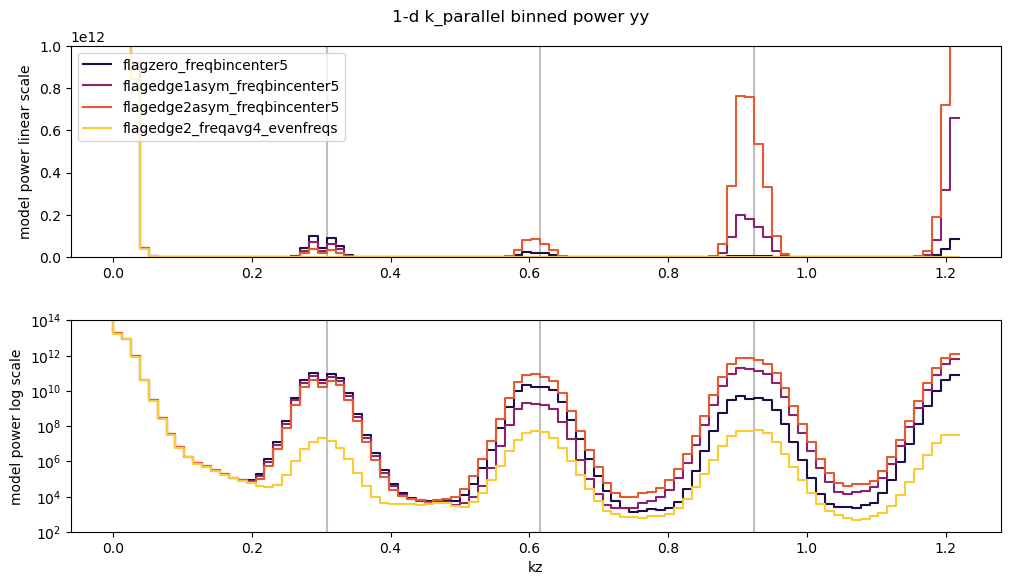

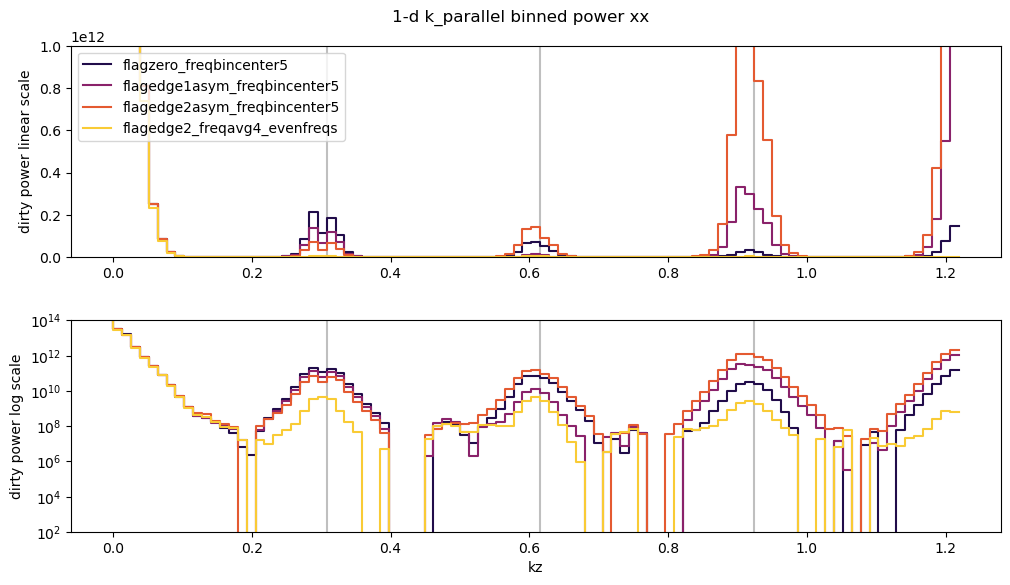

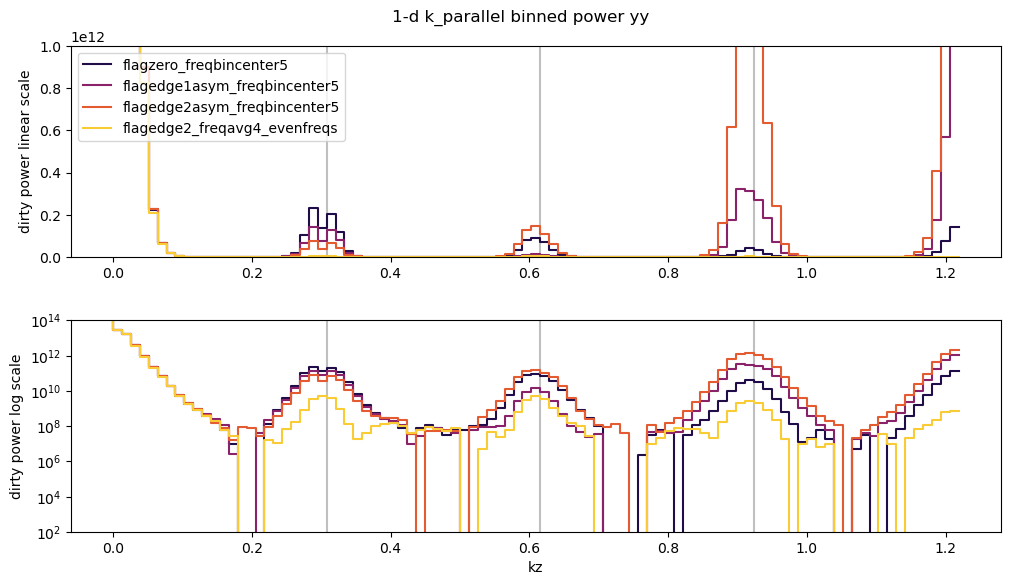

In [22]:
yliim = (1e2, 1e12)
log_ylim = (1e2, 1e14)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use = freq_avg[3:6] + [freq_avg[8]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, axes = plt.subplots(nrows = 2, figsize=(12, 6))
        ax = axes[0]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(ylim)
        ax.set_yscale('linear')
        ax.set_ylabel(i + ' power linear scale')
        ax.legend(loc='upper left')
        ax = axes[1]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

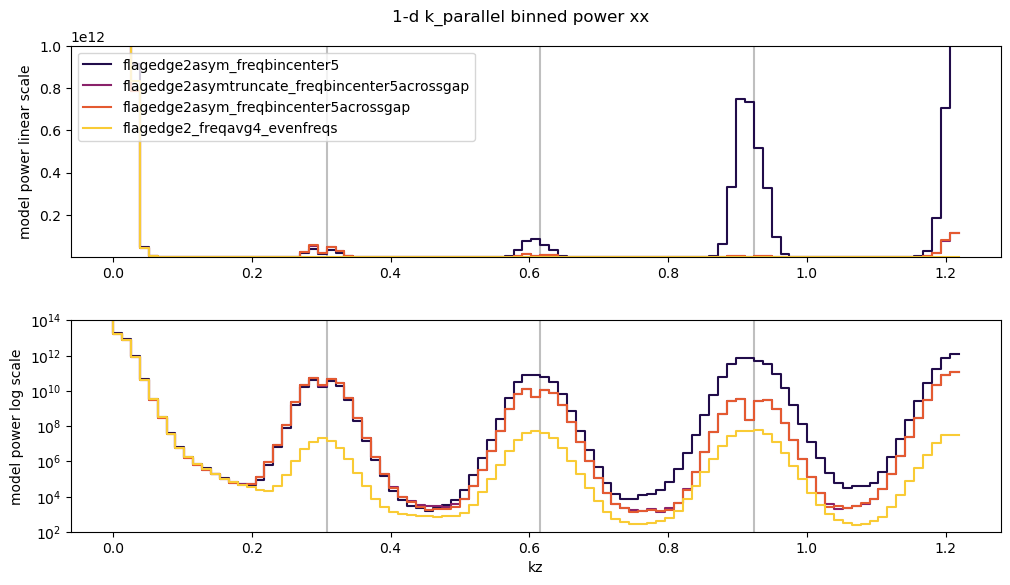

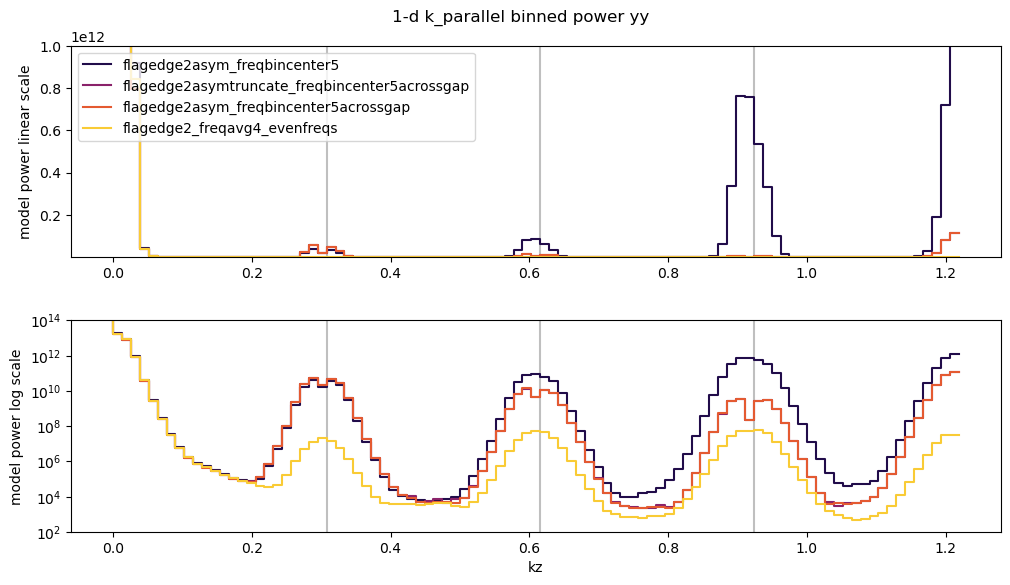

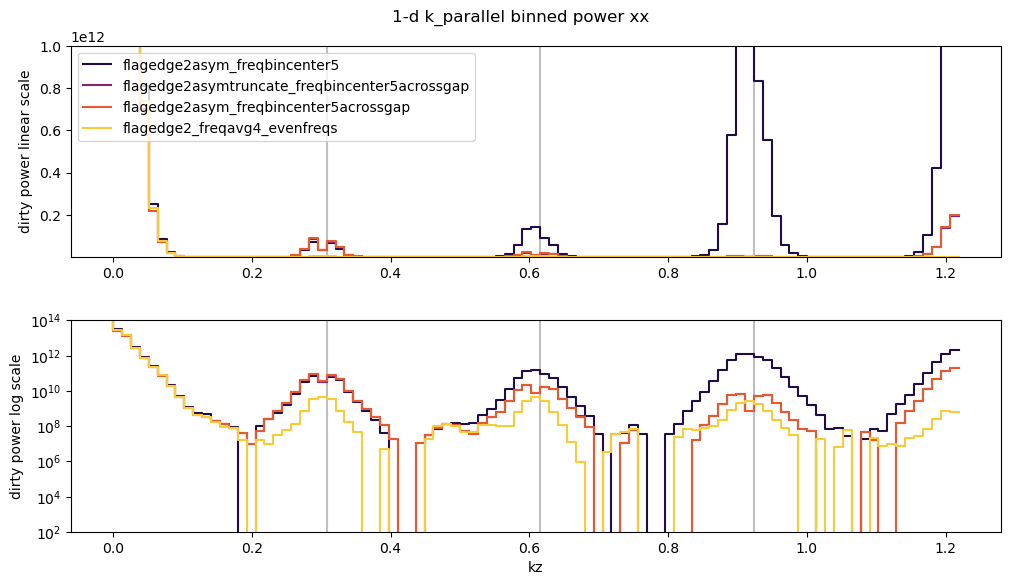

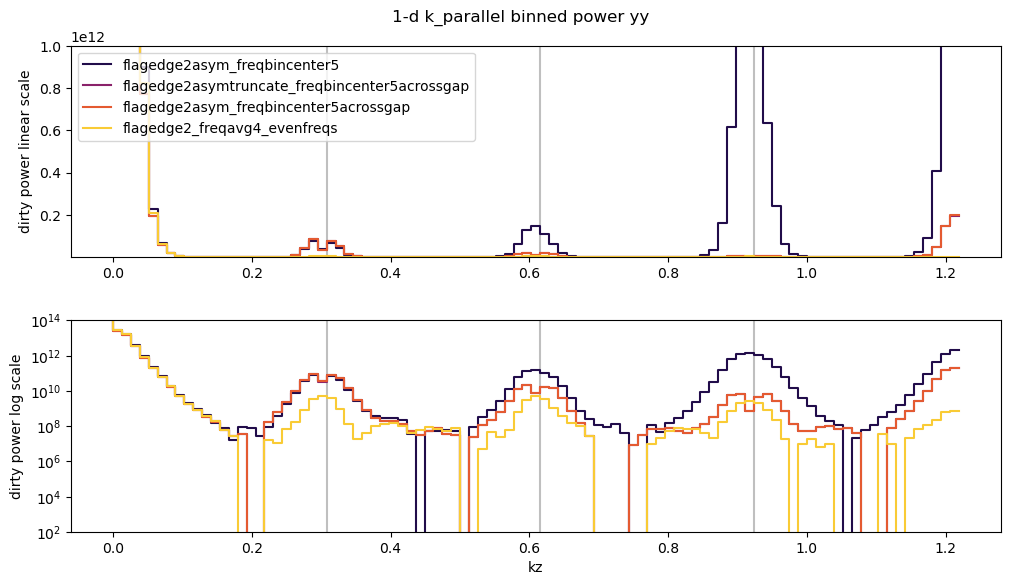

In [23]:
log_ylim = (1e2, 1e14)
ylim = (1e2, 1e12)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use = freq_avg[5:8]+ [freq_avg[8]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, axes = plt.subplots(nrows = 2, figsize=(12, 6))
        ax = axes[0]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(ylim)
        ax.set_yscale('linear')
        ax.set_ylabel(i + ' power linear scale')
        ax.legend(loc='upper left')
        ax = axes[1]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

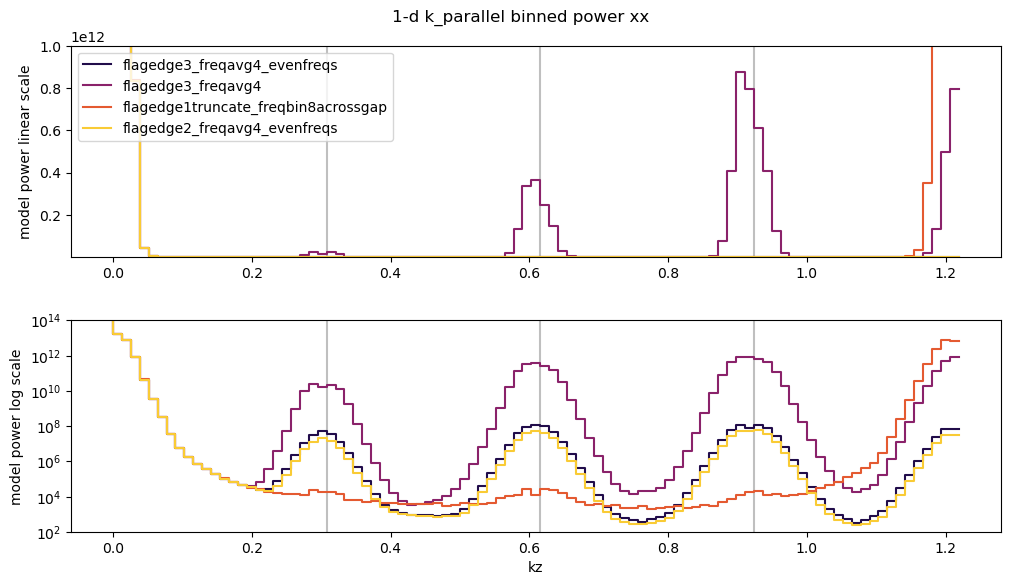

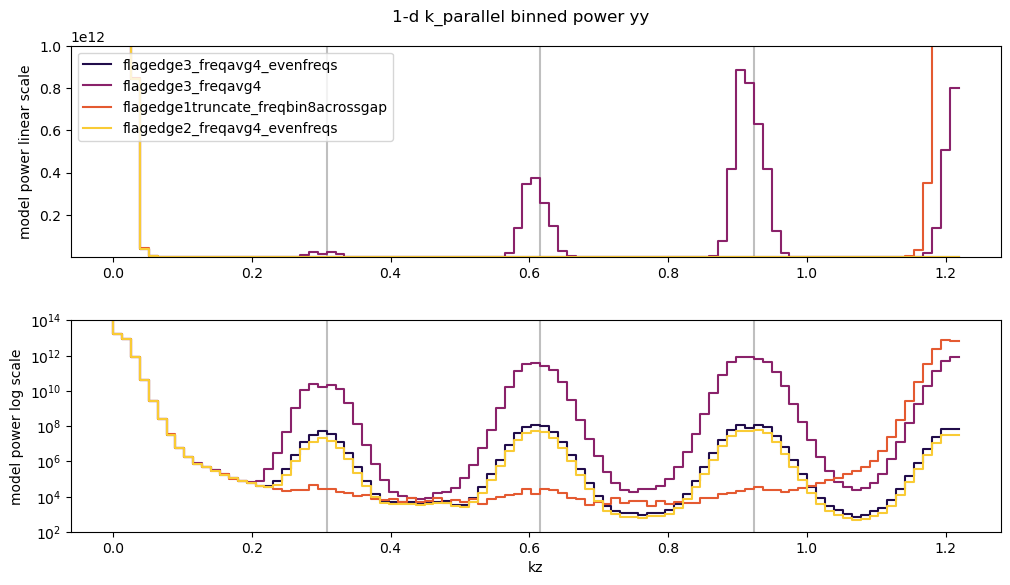

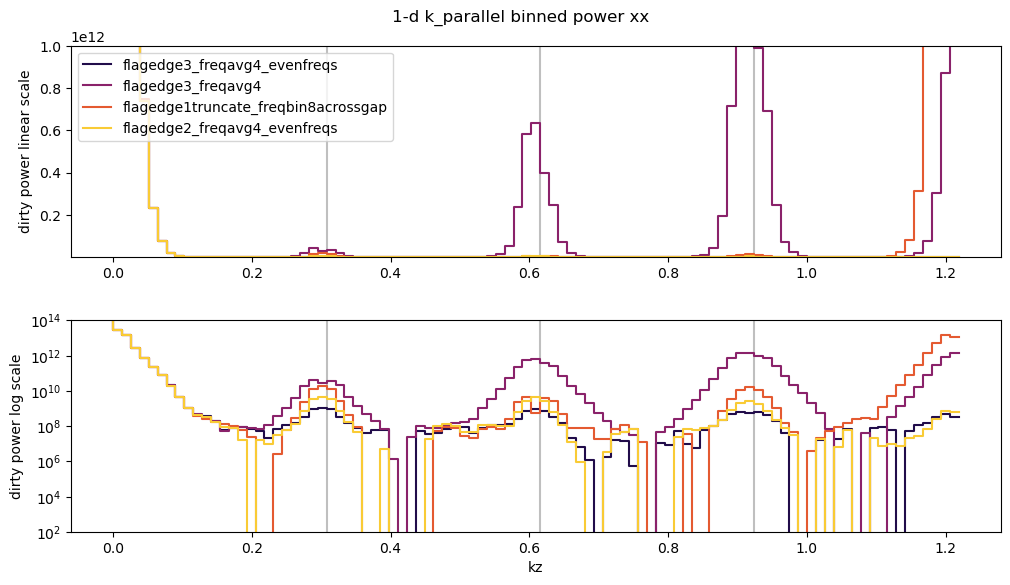

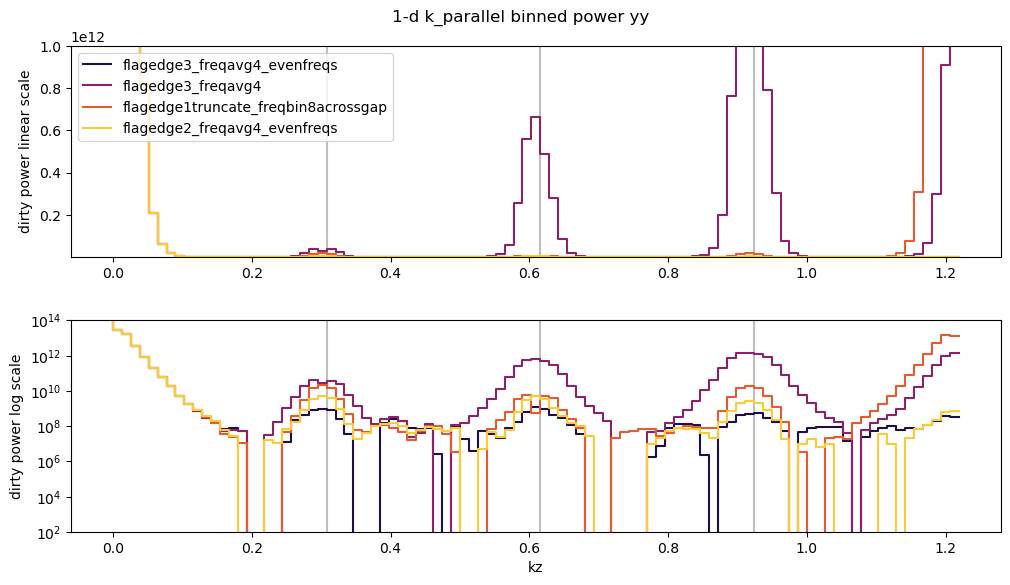

In [24]:
log_ylim = (1e2, 1e14)
ylim = (1e2, 1e12)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use = freq_avg[10:13]+ [freq_avg[8]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, axes = plt.subplots(nrows = 2, figsize=(12, 6))
        ax = axes[0]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(ylim)
        ax.set_yscale('linear')
        ax.set_ylabel(i + ' power linear scale')
        ax.legend(loc='upper left')
        ax = axes[1]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

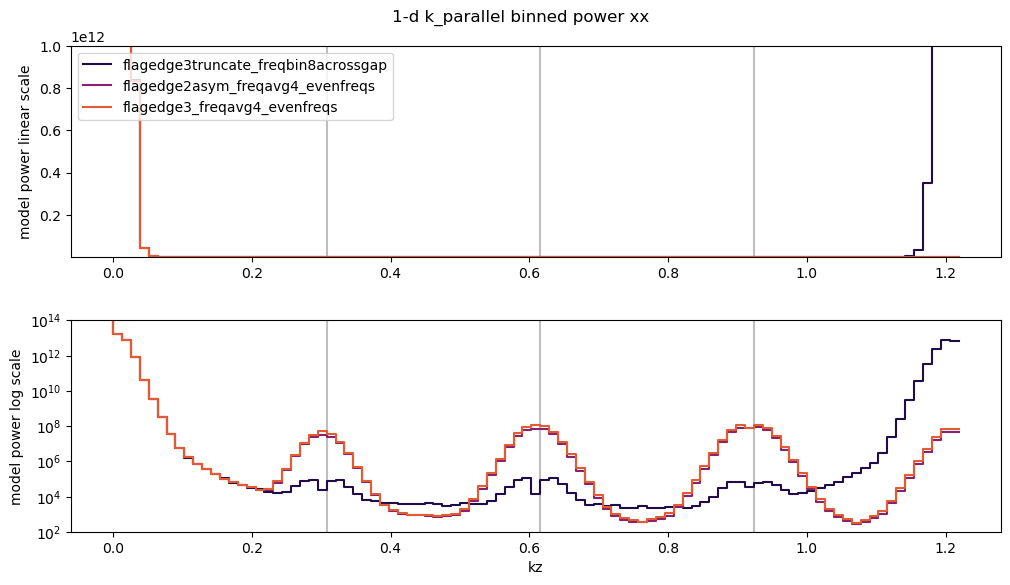

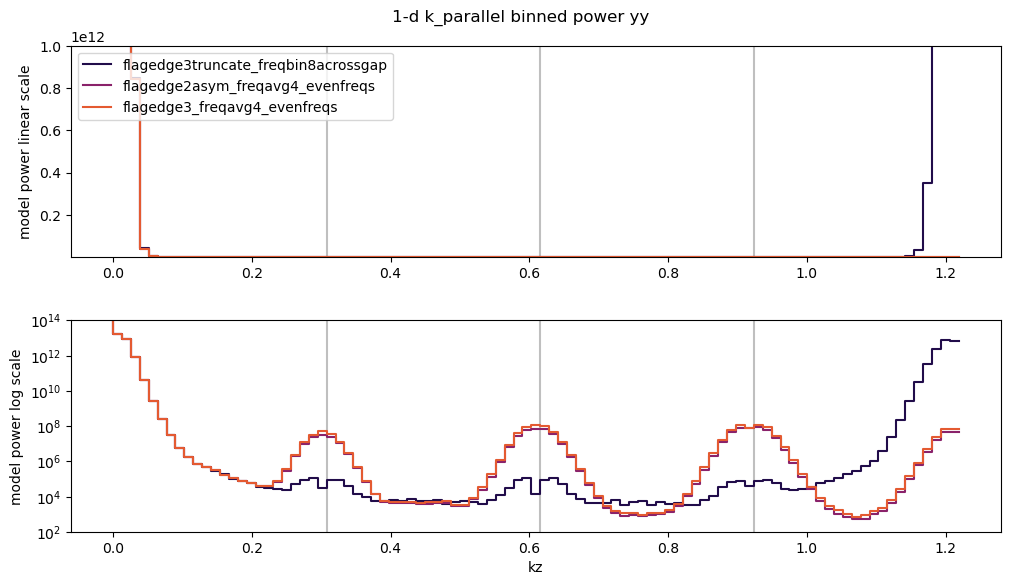

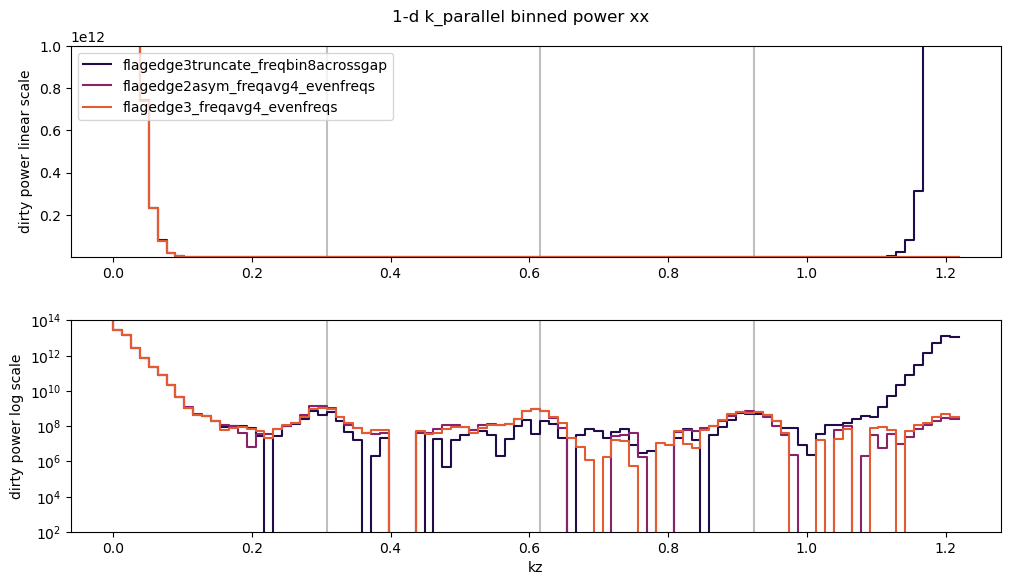

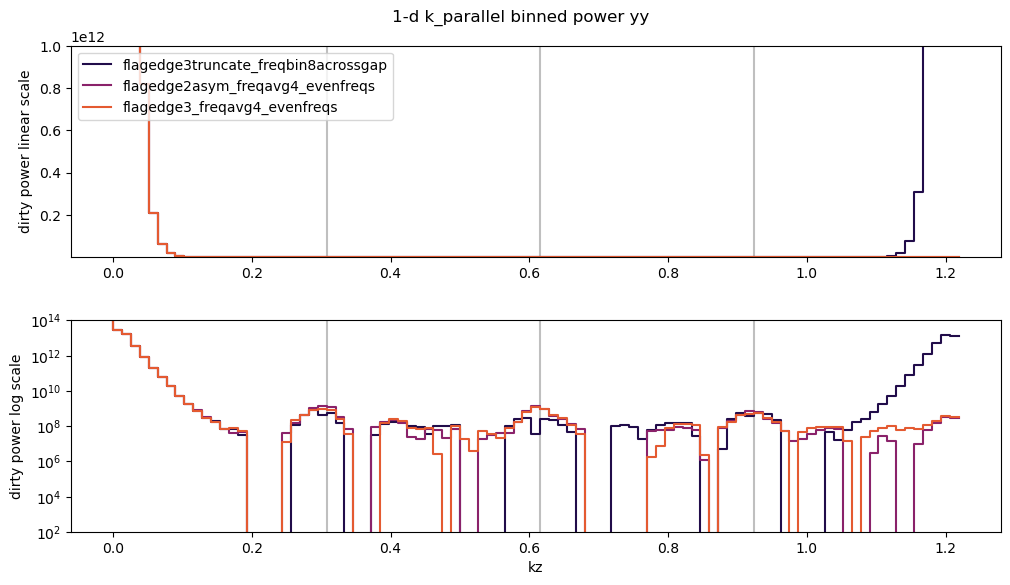

In [25]:
log_ylim = (1e2, 1e14)
ylim = (1e2, 1e12)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use = freq_avg[14:16]+ [freq_avg[10]]
for i in ('model', 'dirty'):
    for j in ('xx', 'yy'):
        data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, freq_avg_use, i, j)
        kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
        kz = kz[:-1]
        fig, axes = plt.subplots(nrows = 2, figsize=(12, 6))
        ax = axes[0]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(ylim)
        ax.set_yscale('linear')
        ax.set_ylabel(i + ' power linear scale')
        ax.legend(loc='upper left')
        ax = axes[1]
        ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.5)
        for k in data_dict3.keys():
            ax.step(kz, data_dict3[k].power, label=freq_avg_use[k][:-1], color=my_colors1[(2 * k) +1])
        ax.set_ylim(log_ylim)
        ax.set_yscale('log')
        ax.set_ylabel(i + ' power log scale')
        ax.set_xlabel('kz')
        plt.suptitle('1-d k_parallel binned power ' + j)
        plt.subplots_adjust(top=0.92, hspace=.3)
        plt.show()
        plt.close()

In [26]:
# make table lists
base_table = np.array(['blue','blue','blue','blue','orange','orange','orange','orange'], dtype = 'U8')
base_table = np.tile(base_table, (1,6))
base_table[:, 8] = 'black'
base_table[:, 32] = 'black'

In [27]:
table_nums =np.array([[np.nan] * 48])
table_nums[:, [8,40]] = 0

In [28]:
table_nums

array([[nan, nan, nan, nan, nan, nan, nan, nan,  0., nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan,  0., nan, nan, nan, nan, nan, nan, nan]])

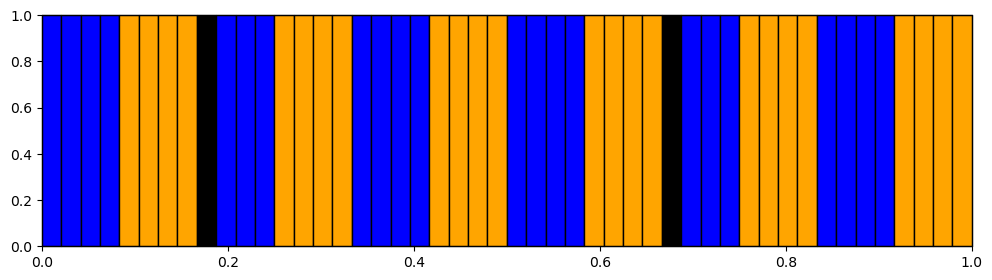

In [29]:
fig, ax = plt.subplots(figsize = (12, 3))

ax.table(cellColours=base_table, bbox = [0, 0, 1, 1])
plt.show()
plt.close()

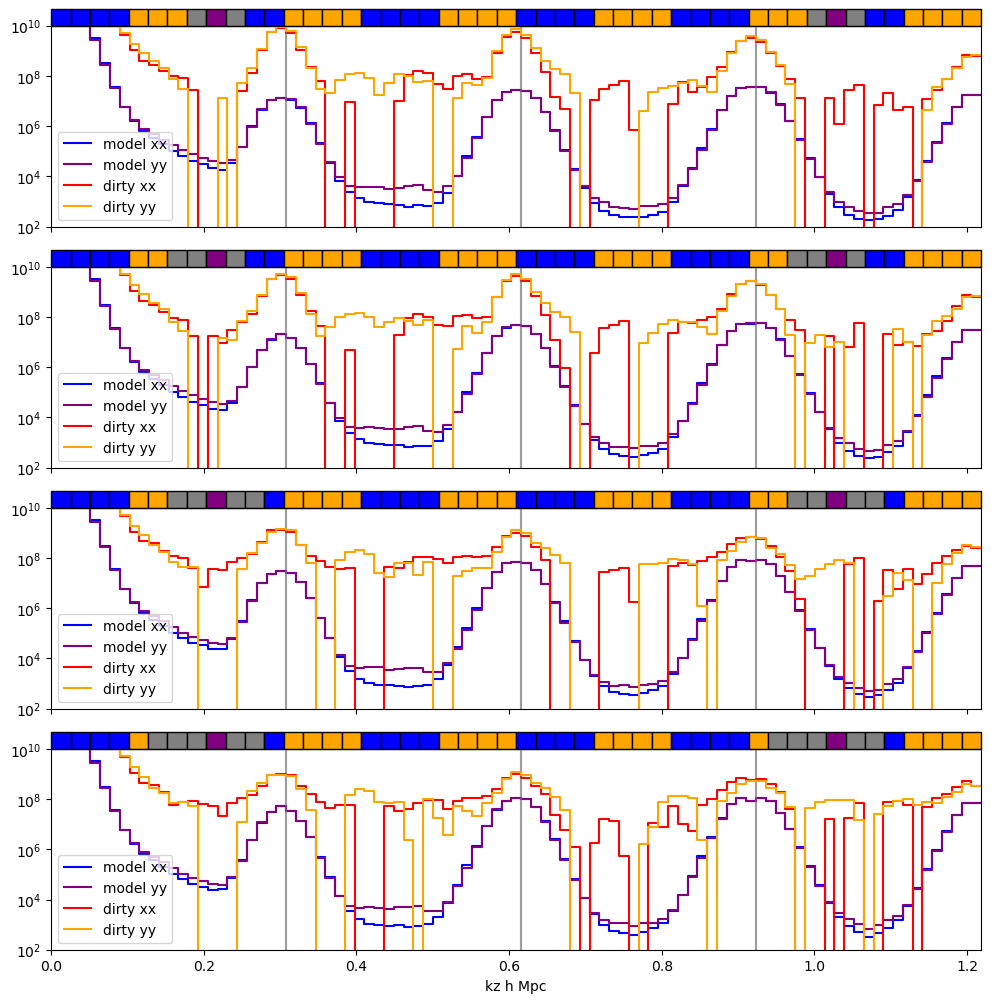

In [30]:
# make a pdf plot with a table above each row, where each row shows dirty xx, dirty yy, model  xx, model yy
# want (all w freqavg4_evenfreqs):
# flagedge1_asym
# flagedge2
# flagedge2_asym
# flagedge3
base_table = np.array(['blue','blue','blue','blue','orange','orange','orange','orange'], dtype = 'U8')
base_table = np.tile(base_table, (1,6))
base_table[:, [8, 40]] = 'purple'
base_table[:, [7, 9, 39, 41]] = 'grey'
base_table1 = np.copy(base_table)
base_table1[:, [6, 38]] = 'grey'
base_table2 = np.copy(base_table1)
base_table2[:, [10, 42]] = 'grey'
base_table3 = np.copy(base_table2)
base_table3[:, [5, 37]] = 'grey'
tables = [base_table, base_table1, base_table2, base_table3]
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e10)
ylim = (1e2, 1e10)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use = ['flagedge1asym_freqavg4_evenfreqs_', 'flagedge2_freqavg4_evenfreqs_', 'flagedge2asym_freqavg4_evenfreqs_', 'flagedge3_freqavg4_evenfreqs_']
fig, axes = plt.subplots(nrows=4, figsize=(12,12))
for i in range(4):
    ax = axes[i]
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], loc='top')
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    if i==3:
        ax.set_xlabel('kz h Mpc')
    else:
        ax.tick_params(labelbottom=False)
plt.show()
plt.close()
        

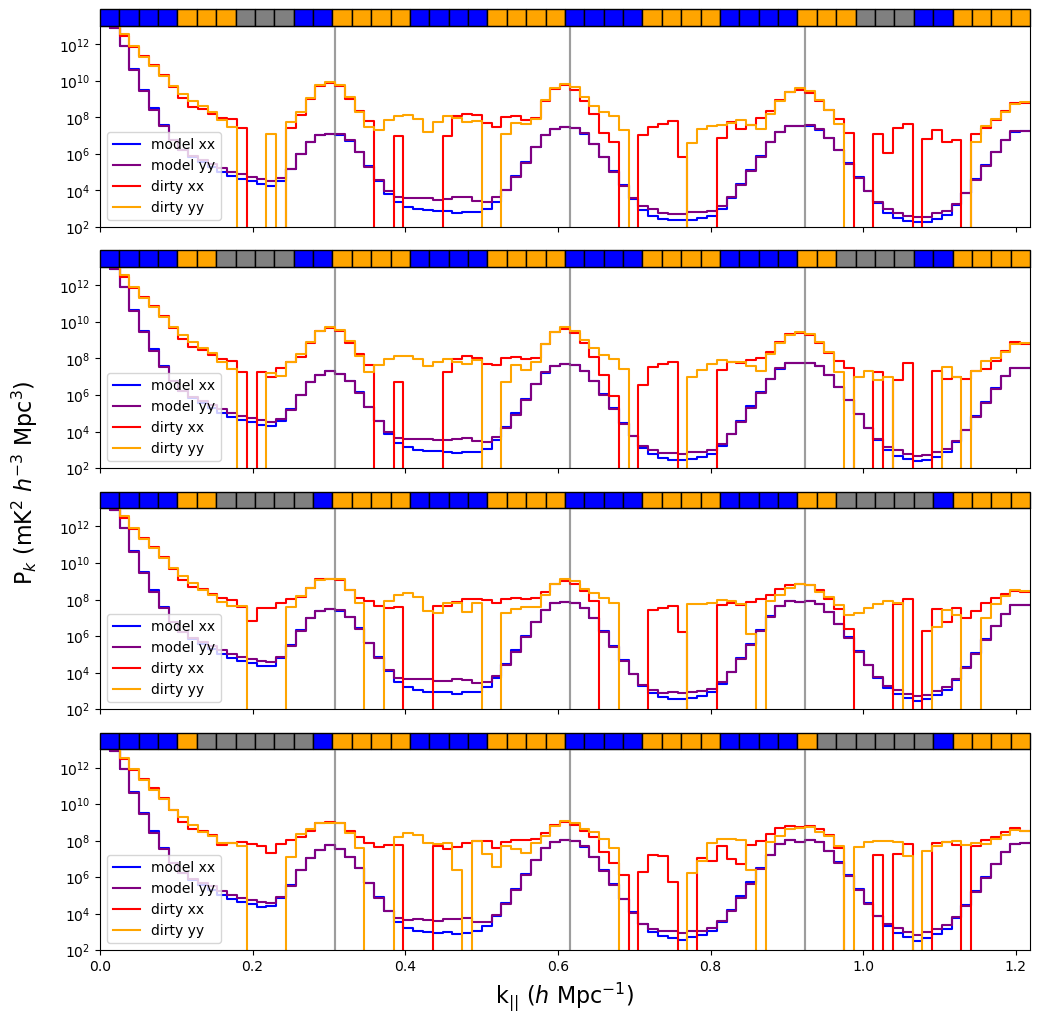

In [31]:
base_table = np.array(['blue','blue','blue','blue','orange','orange','orange','orange'], dtype = 'U8')
base_table = np.tile(base_table, (1,6))
base_table[:, [8, 40]] = 'grey'
base_table[:, [7, 9, 39, 41]] = 'grey'
base_table1 = np.copy(base_table)
base_table1[:, [6, 38]] = 'grey'
base_table2 = np.copy(base_table1)
base_table2[:, [10, 42]] = 'grey'
base_table3 = np.copy(base_table2)
base_table3[:, [5, 37]] = 'grey'
tables = [base_table, base_table1, base_table2, base_table3]
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e13)
ylim = (1e2, 1e10)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use = ['flagedge1asym_freqavg4_evenfreqs_', 'flagedge2_freqavg4_evenfreqs_', 'flagedge2asym_freqavg4_evenfreqs_', 'flagedge3_freqavg4_evenfreqs_']
fig, axes = plt.subplots(nrows=4, figsize=(12,12))
for i in range(4):
    ax = axes[i]
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], loc='top', fontsize='22', cellLoc='center')
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    if i==3:
        ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
    else:
        ax.tick_params(labelbottom=False)
fig.supylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
fig.savefig('/Users/pstar/EORanalysis/thesis_plots/av_four_flag_compare.pdf')
plt.show()
plt.close()

In [9]:
def thesis_flag_avg_plots(tables, freq_avg_use, plotname, widths=None):
    colours = ['blue', 'purple', 'red', 'orange']
    log_ylim = (1e2, 1e13)
    ylim = (1e2, 1e10)
    cb_kz = [0.30785424,0.61570847,0.92356277]
    # generate arrays for horizontal ticks
    htick1 = np.full(96, np.nan)
    htick1[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e10
    htick2 = np.full(96, np.nan)
    htick2[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e6

    nrows = len(freq_avg_use)
    fig, axes = plt.subplots(nrows=nrows, figsize=(12,3*nrows))
    for i in range(nrows):
        ax = axes[i]
        for j, t in enumerate(('model', 'dirty')):
            for k, p in enumerate(('xx', 'yy')):
                data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
                kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
                kz = kz[:-1]
                ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
                ax.plot(kz, htick1, color='grey', alpha=0.3)
                ax.plot(kz, htick2, color='grey', alpha=0.3)
                ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
        ax.legend(loc='lower left')
        ax.set_ylim(log_ylim)
        ax.set_xlim(kz[0], kz[-1])
        ax.set_yscale('log')
        ax.table(cellColours=tables[i], bbox=[0, 1.05, 1, 0.09], cellLoc='center', colWidths=widths)
        ax.add_patch(Rectangle((0.5, 500), 1, 1))
        if i==nrows-1:
            ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
        else:
            ax.tick_params(labelbottom=False)
    fig.supylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
    plt.subplots_adjust(hspace=0.3)
    fig.savefig('/Users/pstar/EORanalysis/thesis_plots/' + plotname + '.pdf')
    plt.show()
    plt.close()

In [11]:
base_table = np.array(['green','green','green','green','aqua','aqua','aqua','aqua'], dtype = 'U8')
base_table = np.tile(base_table, (1,6))
base_table = np.insert(base_table, 40, 'black')
base_table = np.insert(base_table, 8, 'black')
base_table# will end up with 50 cells; default width is 1/50

array(['green', 'green', 'green', 'green', 'aqua', 'aqua', 'aqua', 'aqua',
       'black', 'green', 'green', 'green', 'green', 'aqua', 'aqua',
       'aqua', 'aqua', 'green', 'green', 'green', 'green', 'aqua', 'aqua',
       'aqua', 'aqua', 'green', 'green', 'green', 'green', 'aqua', 'aqua',
       'aqua', 'aqua', 'green', 'green', 'green', 'green', 'aqua', 'aqua',
       'aqua', 'aqua', 'black', 'green', 'green', 'green', 'green',
       'aqua', 'aqua', 'aqua', 'aqua'], dtype='<U8')

(1, 50)
225173268283713.66
245380359616222.75
249440549606320.94
351555325091957.7
225190301441112.4
245357012394811.12
248987573539162.38
350913009423224.7
225158870775029.06
245365281691824.4
248486663940975.78
350200583753657.4
225200627824433.34
245354100809498.62
248223157685597.47
349896636354262.44


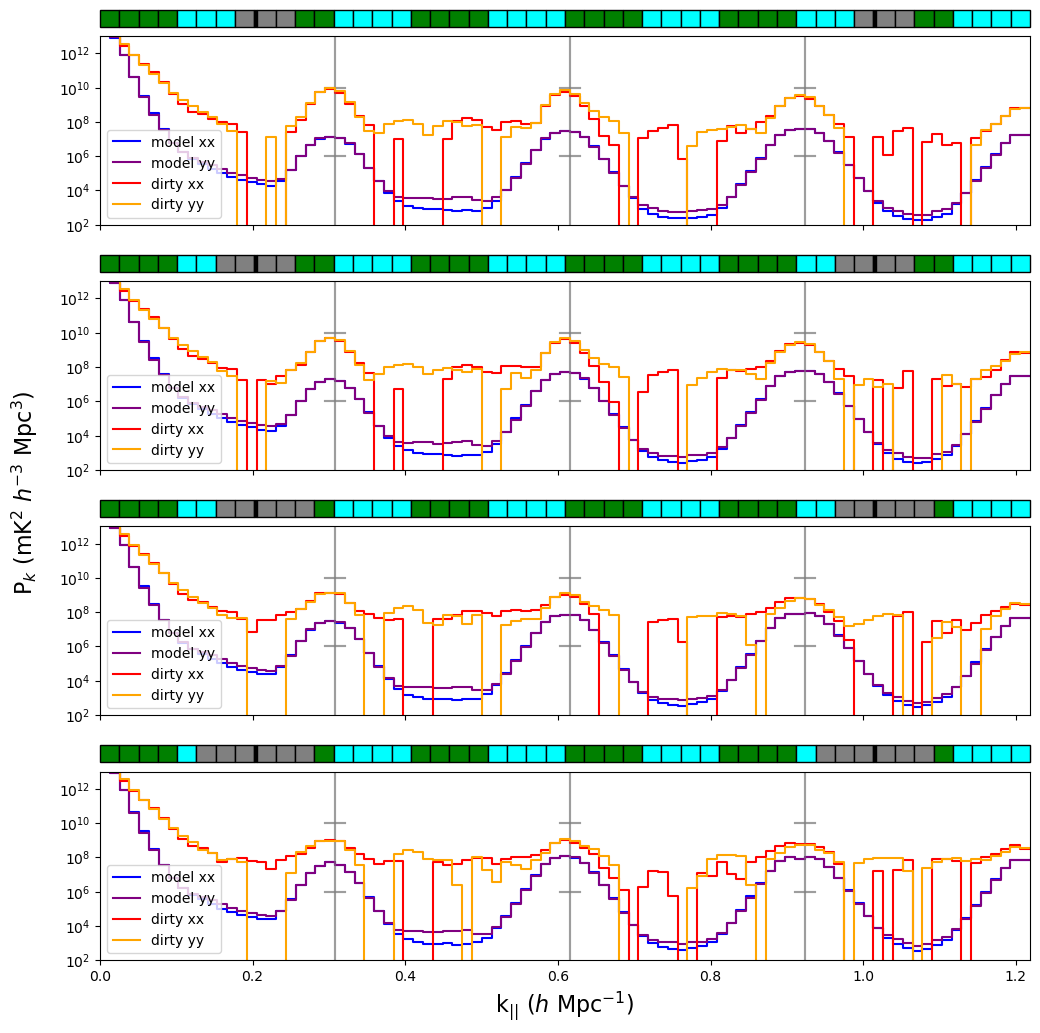

In [10]:
base_table = np.array(['green','green','green','green','aqua','aqua','aqua','aqua'], dtype = 'U8')
base_table = np.tile(base_table, 6)
base_table[[8, 40]] = 'grey'
base_table[[7, 9, 39, 41]] = 'grey'
base_table = np.insert(base_table, 40, 'black')
base_table = np.insert(base_table, 8, 'black')
base_table = base_table[np.newaxis, :]
print(base_table.shape)
base_table1 = np.copy(base_table)
base_table1[:, [6, 39]] = 'grey'
base_table2 = np.copy(base_table1)
base_table2[:, [11, 44]] = 'grey'
base_table3 = np.copy(base_table2)
base_table3[:, [5, 38]] = 'grey'

tables = [base_table, base_table1, base_table2, base_table3]

widths = np.full(50, 8/386)
widths[8] = 1/386
widths[41] = 1/386
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e13)
ylim = (1e2, 1e10)
cb_kz = [0.30785424,0.61570847,0.92356277]
# generate arrays for horizontal ticks
htick1 = np.full(96, np.nan)
htick1[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e10
htick2 = np.full(96, np.nan)
htick2[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e6
freq_avg_use = ['flagedge1asym_freqavg4_evenfreqs_', 'flagedge2_freqavg4_evenfreqs_', 'flagedge2asym_freqavg4_evenfreqs_', 'flagedge3_freqavg4_evenfreqs_']
nrows = len(freq_avg_use)
fig, axes = plt.subplots(nrows=nrows, figsize=(12,12))
for i in range(nrows):
    ax = axes[i]
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.plot(kz, htick1, color='grey', alpha=0.3)
            ax.plot(kz, htick2, color='grey', alpha=0.3)
            ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
            print(data_dict3[0].power[0])
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], bbox=[0, 1.05, 1, 0.09], cellLoc='center', colWidths=widths)
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    if i==nrows-1:
        ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
    else:
        ax.tick_params(labelbottom=False)
fig.supylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
fig.savefig('/Users/pstar/EORanalysis/thesis_plots/freq_flag_compare.pdf')
plt.subplots_adjust(hspace=0.3)
plt.show()
plt.close()

(1, 50)


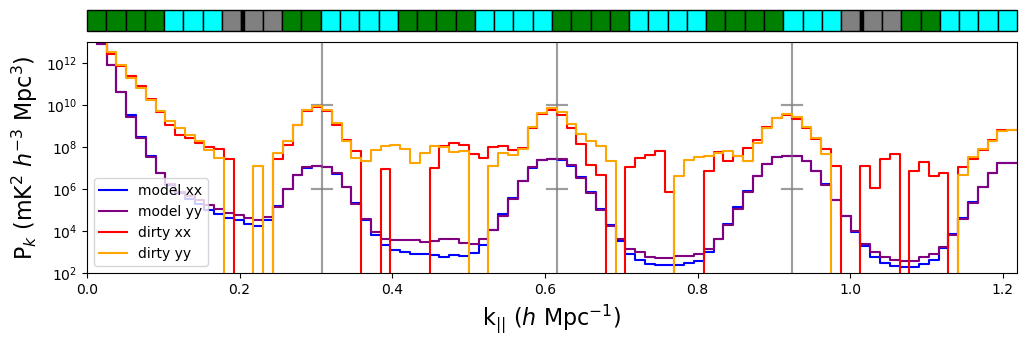

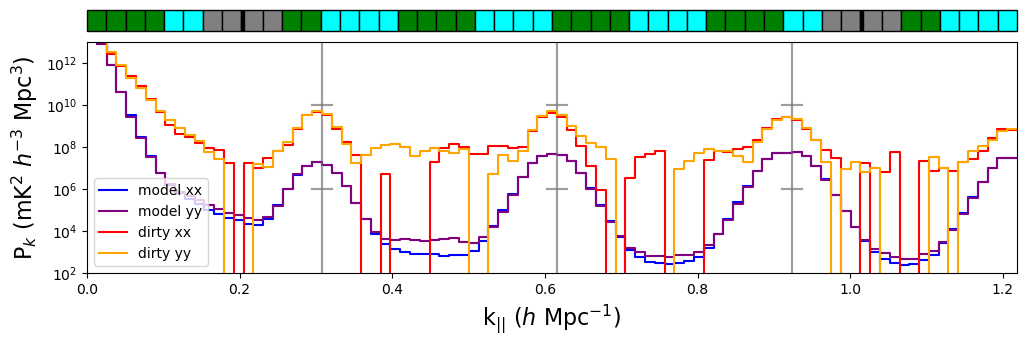

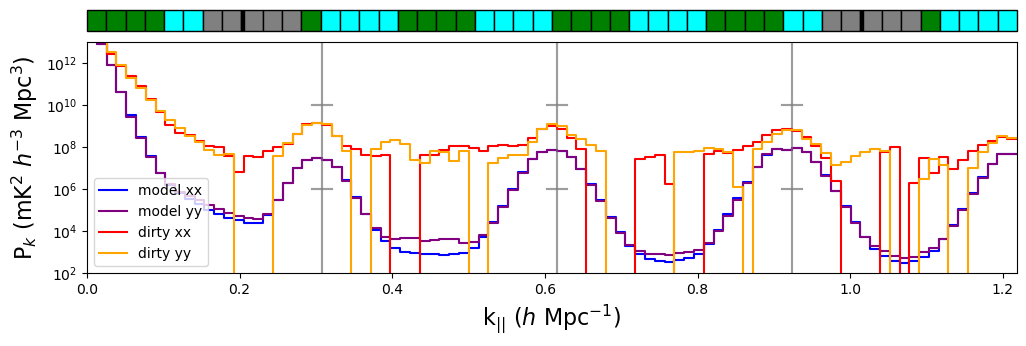

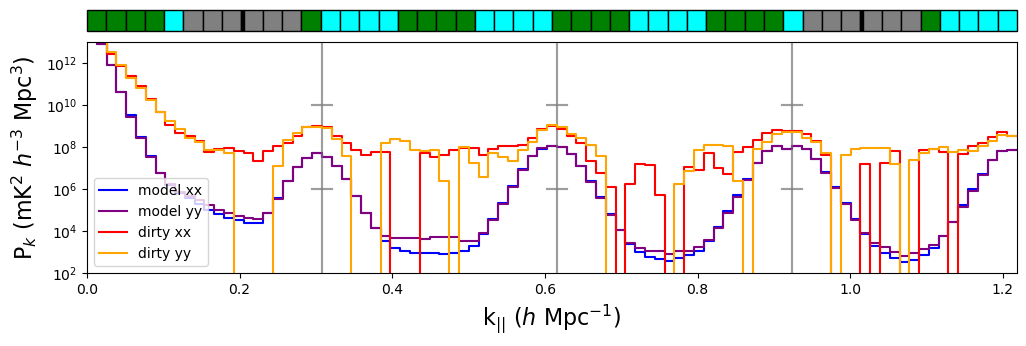

In [13]:
base_table = np.array(['green','green','green','green','aqua','aqua','aqua','aqua'], dtype = 'U8')
base_table = np.tile(base_table, 6)
base_table[[8, 40]] = 'grey'
base_table[[7, 9, 39, 41]] = 'grey'
base_table = np.insert(base_table, 40, 'black')
base_table = np.insert(base_table, 8, 'black')
base_table = base_table[np.newaxis, :]
print(base_table.shape)
base_table1 = np.copy(base_table)
base_table1[:, [6, 39]] = 'grey'
base_table2 = np.copy(base_table1)
base_table2[:, [11, 44]] = 'grey'
base_table3 = np.copy(base_table2)
base_table3[:, [5, 38]] = 'grey'

tables = [base_table, base_table1, base_table2, base_table3]

widths = np.full(50, 8/386)
widths[8] = 1/386
widths[41] = 1/386
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e13)
ylim = (1e2, 1e10)
cb_kz = [0.30785424,0.61570847,0.92356277]
# generate arrays for horizontal ticks
htick1 = np.full(96, np.nan)
htick1[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e10
htick2 = np.full(96, np.nan)
htick2[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e6
freq_avg_use = ['flagedge1asym_freqavg4_evenfreqs_', 'flagedge2_freqavg4_evenfreqs_', 'flagedge2asym_freqavg4_evenfreqs_', 'flagedge3_freqavg4_evenfreqs_']
nrows = len(freq_avg_use)
for i in range(nrows):
    fig, ax = plt.subplots(figsize=(12,3))
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.plot(kz, htick1, color='grey', alpha=0.3)
            ax.plot(kz, htick2, color='grey', alpha=0.3)
            ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], bbox=[0, 1.05, 1, 0.09], cellLoc='center', colWidths=widths)
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
    ax.set_ylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
# fig.savefig('/Users/pstar/EORanalysis/thesis_plots/freq_flag_compare.pdf')
    plt.subplots_adjust(hspace=0.3)
    plt.show()
    plt.close()

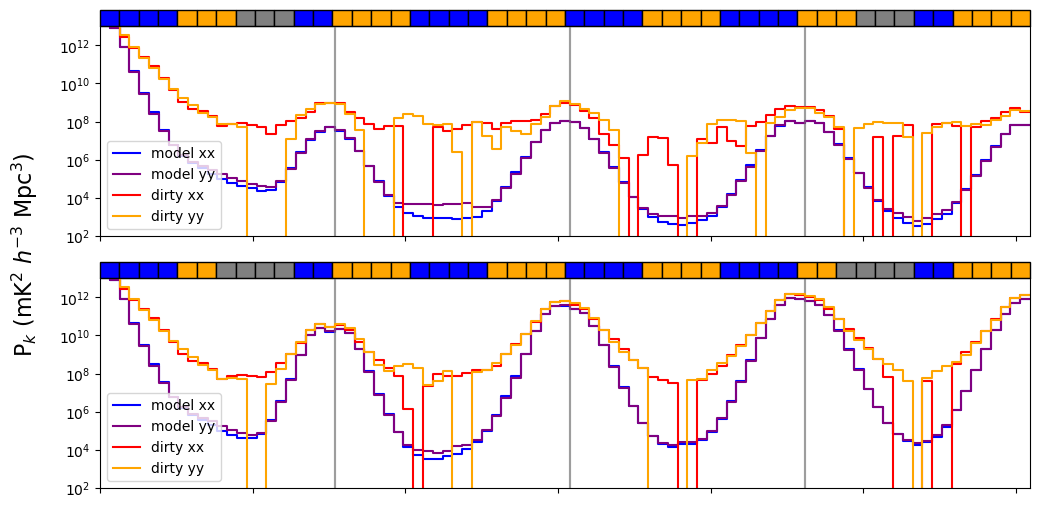

In [65]:
# first plot shows impacts of flagging deeper and deeper
# next plot shows impacts of using uneven frequencies; maybe do two panels with even and two with uneven to compare?
base_table = np.array(['blue','blue','blue','blue','orange','orange','orange','orange'], dtype = 'U8')
base_table = np.tile(base_table, (1,6))
base_table[:, [8, 40]] = 'grey'
base_table[:, [7, 9, 39, 41]] = 'grey'
base_table1 = np.copy(base_table)
base_table1[:, [6, 38]] = 'grey'
base_table2 = np.copy(base_table1)
base_table2[:, [10, 42]] = 'grey'
base_table3 = np.copy(base_table2)
base_table3[:, [5, 37]] = 'grey'
tables = [base_table, base_table1, base_table2, base_table3]
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e13)
ylim = (1e2, 1e10)
cb_kz = [0.30785424,0.61570847,0.92356277]
freq_avg_use = ['flagedge3_freqavg4_evenfreqs_', 'flagedge3_freqavg4_']
fig, axes = plt.subplots(nrows=len(freq_avg_use), figsize=(12,3 * len(freq_avg_use)))
for i in range(len(freq_avg_use)):
    ax = axes[i]
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], loc='top', fontsize='22', cellLoc='center')
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    if i==3:
        ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
    else:
        ax.tick_params(labelbottom=False)
fig.supylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
# fig.savefig('/Users/pstar/EORanalysis/thesis_plots/av_four_flag_compare.pdf')
plt.show()
plt.close()

[2.25226936e+14 1.72729800e+13 8.16725954e+12 8.34690863e+11
 4.38481992e+10 3.24672186e+09 3.13954228e+08 3.69577585e+07
 5.96035464e+06 1.65841635e+06 6.66555977e+05 3.56058574e+05
 1.94768314e+05 1.05028545e+05 6.47748513e+04 4.51714750e+04
 4.17238680e+04 6.81377639e+04 3.87562492e+05 3.76211268e+06
 4.99740332e+07 9.90024758e+08 1.02950981e+10 2.53707824e+10
 1.60426891e+10 2.20994429e+10 1.29289001e+10 1.89704679e+09
 1.30192942e+08 9.06748266e+06 8.08528022e+05 8.95944236e+04
 1.48445461e+04 5.27136018e+03 3.34231265e+03 3.56282225e+03
 4.92591837e+03 6.18747052e+03 1.07395191e+04 2.54135775e+04
 1.02419065e+05 6.97603080e+05 6.36617709e+06 7.23887422e+07
 1.07877388e+09 1.72014679e+10 1.33841387e+11 3.36425217e+11
 3.62455451e+11 2.47302963e+11 1.45147801e+11 3.05408303e+10
 3.08392815e+09 2.40913801e+08 2.03297479e+07 2.03150733e+06
 2.60253099e+05 5.22198479e+04 2.05957213e+04 1.42277311e+04
 2.13052800e+04 1.99212785e+04 3.15372732e+04 8.72973371e+04
 4.47027415e+05 3.674023

NameError: name 'widths' is not defined

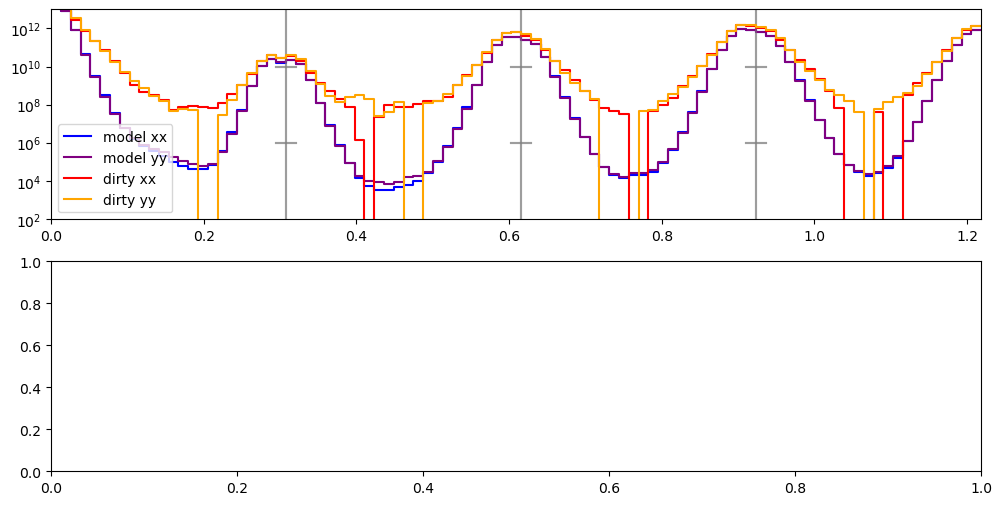

In [9]:
# first plot shows impacts of flagging deeper and deeper
# next plot shows impacts of using uneven frequencies; maybe do two panels with even and two with uneven to compare?
base_table = np.array(['green','green','green','green','aqua','aqua','aqua','aqua'], dtype = 'U8')
base_table = np.tile(base_table, (1,6))
base_table[:, [8, 40]] = 'grey'
base_table[:, [7, 9, 39, 41]] = 'grey'
base_table1 = np.copy(base_table)
base_table1[:, [6, 38]] = 'grey'
base_table2 = np.copy(base_table1)
base_table2[:, [10, 42]] = 'grey'
base_table3 = np.copy(base_table2)
base_table3[:, [5, 37]] = 'grey'

base_table3 = np.insert(base_table3, 8, 'black')
base_table3 = np.insert(base_table3, -8, 'black')
base_table3 = base_table3[np.newaxis, :]

tables = [base_table3, base_table3]
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e13)
ylim = (1e2, 1e10)
# get coarse band lines
cb_kz = [0.30785424,0.61570847,0.92356277]
# generate arrays for horizontal ticks
htick1 = np.full(96, np.nan)
htick1[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e10
htick2 = np.full(96, np.nan)
htick2[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e6
freq_avg_use = ['flagedge3_freqavg4_', 'flagedge3_freqavg4_evenfreqs_']
fig, axes = plt.subplots(nrows=len(freq_avg_use), figsize=(12,(3 * len(freq_avg_use))))
for i in range(len(freq_avg_use)):
    ax = axes[i]
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.plot(kz, htick1, color='grey', alpha=0.3)
            ax.plot(kz, htick2, color='grey', alpha=0.3)
            ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
            print(data_dict3[0].power)
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], bbox=[0, 1.05, 1, 0.09], cellLoc='center', colWidths=widths)
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    if i==1:
        ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
    else:
        ax.tick_params(labelbottom=False)
fig.supylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
# fig.savefig('/Users/pstar/EORanalysis/thesis_plots/freq_even_uneven_compare.pdf')
plt.subplots_adjust(hspace=0.3)
plt.show()
plt.close()

In [67]:
 # do a set with: uneven freqs
                # mean subtractions turned off
                # hyperfine dft
# need hfine and mean subtract off for flagedge3_evenfreqs w kz_orig_freqs; run these on salix
# then do a set with three at max flagging, five at max flagging, and five spanning the gap with max flagging and truncated bins
# then do a set with eight at max flagging spanning the gap and truncated bins


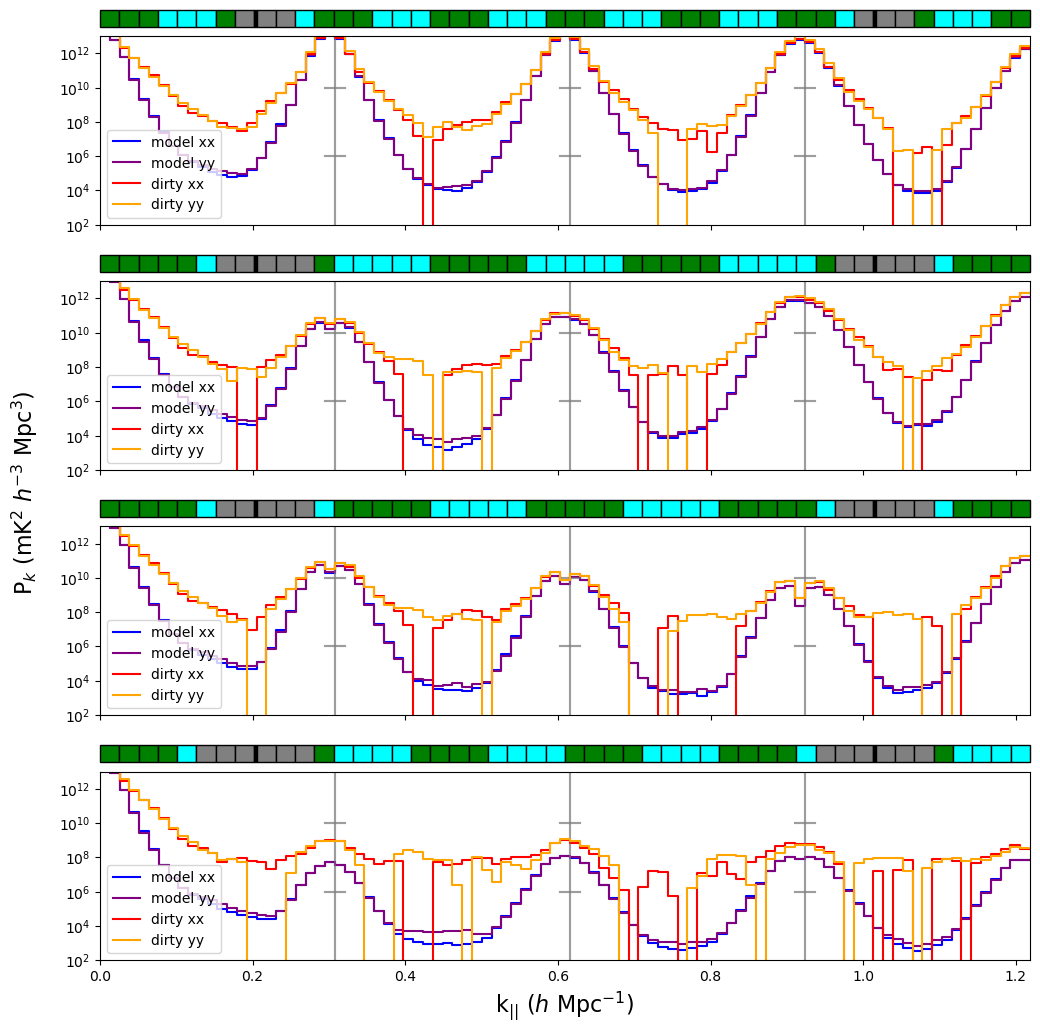

In [33]:
freq_avg_use = ['flagedge2asym_freqbincenter3_', 'flagedge2asym_freqbincenter5_', 'flagedge2asymtruncate_freqbincenter5acrossgap_', 'flagedge3_freqavg4_evenfreqs_']
bin3 = [3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2]
bin5 = [5, 4, 3, 5, 5, 5, 5, 5, 3, 4, 4]
bin5_across = [5, 7, 5, 5, 5, 5, 5, 7, 4]
base_table_bin3 = []
base_table_bin5 = []
base_table_bin5_across = []
for k in range(3):
    table = [base_table_bin3, base_table_bin5, base_table_bin5_across][k]
    bin_scheme = [bin3, bin5, bin5_across][k]
    for i in range(len(bin_scheme)):
        if i%2 == 0:
            for j in range(bin_scheme[i]):
                table.append('green')
        else:
            for j in range(bin_scheme[i]):
                table.append('aqua')
base_table_bin3 = np.array(base_table_bin3, dtype="U8")
base_table_bin3 = base_table_bin3[np.newaxis, :]
base_table_bin5 = np.array(base_table_bin5, dtype="U8")
base_table_bin5 = base_table_bin5[np.newaxis, :]
base_table_bin5_across = np.array(base_table_bin5_across, dtype="U8")
base_table_bin5_across = base_table_bin5_across[np.newaxis, :]

base_table_avg = np.array(['green','green','green','green','aqua','aqua','aqua','aqua'], dtype = 'U8')
base_table_avg = np.tile(base_table_avg, (1,6))
base_table_bin3[:, [8, 40]] = 'grey'
base_table_bin3[:, [7, 9, 39, 41]] = 'grey'
base_table_bin5[:, 6:11] = 'grey'
base_table_bin5[:, 38:43] = 'grey'
base_table_bin5_across[:, 6:11] = 'grey'
base_table_bin5_across[:, 38:43] = 'grey'
base_table_avg[:, 5:11] = 'grey'
base_table_avg[:, 37:43] = 'grey'

base_table_bin3 = np.insert(base_table_bin3, 8, 'black')
base_table_bin3 = np.insert(base_table_bin3, -8, 'black')
base_table_bin3 = base_table_bin3[np.newaxis, :]

base_table_bin5 = np.insert(base_table_bin5, 8, 'black')
base_table_bin5 = np.insert(base_table_bin5, -8, 'black')
base_table_bin5 = base_table_bin5[np.newaxis, :]

base_table_bin5_across = np.insert(base_table_bin5_across, 8, 'black')
base_table_bin5_across = np.insert(base_table_bin5_across, -8, 'black')
base_table_bin5_across = base_table_bin5_across[np.newaxis, :]

base_table_avg = np.insert(base_table_avg, 8, 'black')
base_table_avg = np.insert(base_table_avg, -8, 'black')
base_table_avg = base_table_avg[np.newaxis, :]

widths = np.full(50, 8/386)
widths[8] = 1/386
widths[41] = 1/386

tables = [base_table_bin3, base_table_bin5, base_table_bin5_across, base_table_avg]

thesis_flag_avg_plots(tables, freq_avg_use, 'freq_bin_compare', widths=widths)

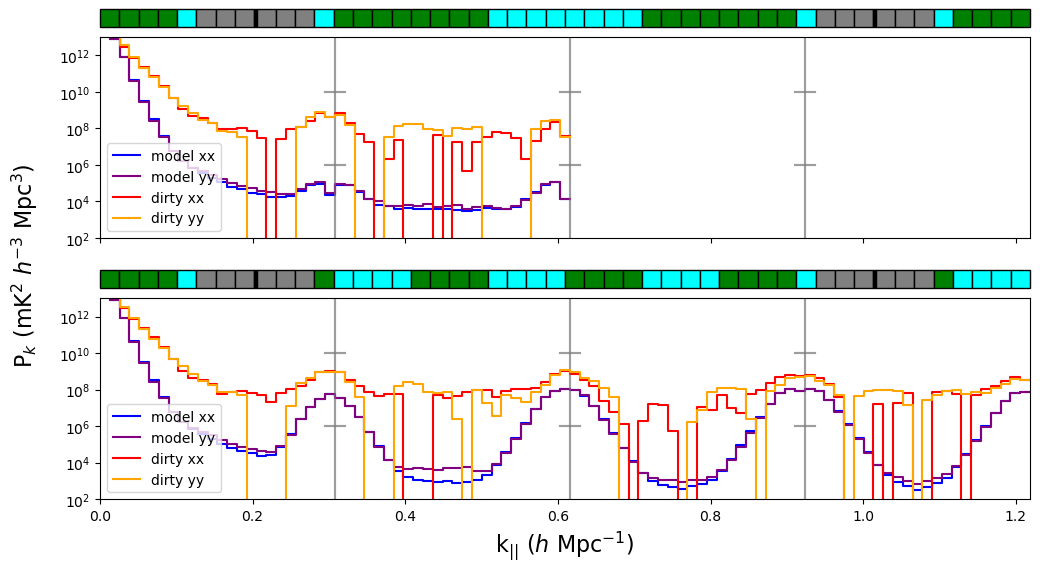

In [39]:
bin_scheme = [4, 8, 8, 8, 8, 8, 4]
table = []
for i in range(len(bin_scheme)):
    if i%2 == 0:
        for j in range(bin_scheme[i]):
            table.append('green')
    else:
        for j in range(bin_scheme[i]):
            table.append('aqua')
table_bin8 = np.array(table, dtype='U8')
table_bin8 = table_bin8[np.newaxis, :]
table_bin8[:, 5:11] = 'grey'
table_bin8[:, 37:43] = 'grey'
table_bin8 = np.insert(table_bin8, 8, 'black')
table_bin8 = np.insert(table_bin8, -8, 'black')
table_bin8 = table_bin8[np.newaxis, :]

tables = [table_bin8, base_table_avg]

freq_avg_use = ['flagedge3truncate_freqbin8acrossgap_', 'flagedge3_freqavg4_evenfreqs_']
plotname = 'freq_bin8_compare'
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e13)
ylim = (1e2, 1e10)
cb_kz = [0.30785424,0.61570847,0.92356277]
# generate arrays for horizontal ticks
htick1 = np.full(96, np.nan)
htick1[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e10
htick2 = np.full(96, np.nan)
htick2[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e6

nrows = len(freq_avg_use)
fig, axes = plt.subplots(nrows=nrows, figsize=(12,3*nrows))
for i in range(nrows):
    ax = axes[i]
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, file_suffix, [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.plot(kz, htick1, color='grey', alpha=0.3)
            ax.plot(kz, htick2, color='grey', alpha=0.3)
            if i == 0:
                ax.step(kz[0:49], data_dict3[0].power[0:49], label=t + ' ' + p, color=colours[k + 2 * j])
            else:
                ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], bbox=[0, 1.05, 1, 0.09], cellLoc='center', colWidths=widths)
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    if i==nrows-1:
        ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
    else:
        ax.tick_params(labelbottom=False)
fig.supylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
plt.subplots_adjust(hspace=0.3)
fig.savefig('/Users/pstar/EORanalysis/thesis_plots/' + plotname + '.pdf')
plt.show()
plt.close()

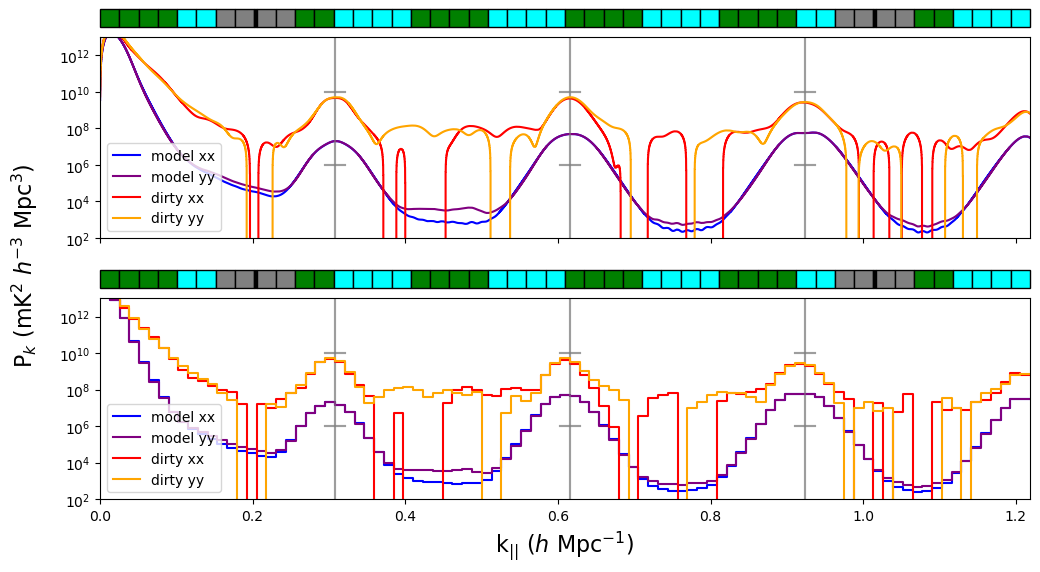

In [34]:
base_table = np.array(['green','green','green','green','aqua','aqua','aqua','aqua'], dtype = 'U8')
base_table = np.tile(base_table, (1,6))
base_table[:, [8, 40]] = 'grey'
base_table[:, [7, 9, 39, 41]] = 'grey'
base_table1 = np.copy(base_table)
base_table1[:, [6, 38]] = 'grey'
base_table2 = np.copy(base_table1)
base_table2[:, [10, 42]] = 'grey'

base_table1 = np.insert(base_table1, 8, 'black')
base_table1 = np.insert(base_table1, -8, 'black')
base_table1 = base_table1[np.newaxis, :]

tables = [base_table1, base_table1]

widths = np.full(50, 8/386)
widths[8] = 1/386
widths[41] = 1/386

freq_avg_use = ['flagedge2_freqavg4_evenfreqs_', 'flagedge2_freqavg4_evenfreqs_']
suffix1 = '_dfthfine_kzorigfreqs_averemove_swbh_dencorr_kperplambda10-50_kpar_power.idlsave'
suffix2 = '_dft_kzorigfreqs_averemove_swbh_dencorr_kperplambda10-50_kpar_power.idlsave'
suffixes = [suffix1, suffix2]
plotname = 'freq_hfine_compare'
colours = ['blue', 'purple', 'red', 'orange']
log_ylim = (1e2, 1e13)
ylim = (1e2, 1e10)
cb_kz = [0.30785424,0.61570847,0.92356277]
# generate arrays for horizontal ticks
htick1 = np.full(96, np.nan)
htick1[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e10
htick2 = np.full(96, np.nan)
htick2[[23, 24, 25, 47, 48, 49, 71, 72, 73]] = 1e6

nrows = len(freq_avg_use)
fig, axes = plt.subplots(nrows=nrows, figsize=(12,3*nrows))
for i in range(nrows):
    ax = axes[i]
    for j, t in enumerate(('model', 'dirty')):
        for k, p in enumerate(('xx', 'yy')):
            data_dict3 = get_sav_data(data_dir, file_prefix, suffixes[i], [freq_avg_use[i]], t, p)
            kz = data_dict3[0].k_edges + data_dict3[0].k_bin / 2
            kz = kz[:-1]
            if i == 0:
                kzhline = np.linspace(kz[0], kz[-1],num=96)
            else:
                kzhline = kz
            ax.vlines(cb_kz, ymin=log_ylim[0], ymax=log_ylim[1], color='grey', alpha=0.3)
            ax.plot(kzhline, htick1, color='grey', alpha=0.3)
            ax.plot(kzhline, htick2, color='grey', alpha=0.3)
            ax.step(kz, data_dict3[0].power, label=t + ' ' + p, color=colours[k + 2 * j])
    ax.legend(loc='lower left')
    ax.set_ylim(log_ylim)
    ax.set_xlim(kz[0], kz[-1])
    ax.set_yscale('log')
    ax.table(cellColours=tables[i], bbox=[0, 1.05, 1, 0.09], cellLoc='center', colWidths=widths)
    ax.add_patch(Rectangle((0.5, 500), 1, 1))
    if i==nrows-1:
        ax.set_xlabel(r'k$_{||}$ ($h$ Mpc$^{-1}$)', fontsize=16)
    else:
        ax.tick_params(labelbottom=False)
fig.supylabel(r'P$_k$ (mK$^2$ $h^{-3}$ Mpc$^3$)',fontsize=16, x=0.05)
plt.subplots_adjust(hspace=0.3)
fig.savefig('/Users/pstar/EORanalysis/thesis_plots/' + plotname + '.pdf')
plt.show()
plt.close()

In [86]:
data_dict3[0].keys()

dict_keys(['power', 'noise', 'sim_noise', 'sim_noise_diff', 'weights', 'noise_expval', 'k_edges', 'k_bin', 'kperp_lambda_conv', 'delay_params', 'hubble_param', 'freq_mask', 'kperp_range', 'kperp_range_lambda', 'kx_range', 'kx_range_lambda', 'ky_range', 'ky_range_lambda', 'kpar_range', 'window_int', 'git_hashes', 'wt_ave_power', 'ave_power', 'ave_weights', 'wt_ave_power_freq', 'ave_power_freq', 'wt_ave_power_uvf', 'ave_power_uvf', 'uv_pix_area', 'uv_area'])

In [30]:
a = np.array([[1,2],[3,4]])

In [31]:
a

array([[1, 2],
       [3, 4]])

In [32]:
a[:,0] - a[:, 1]

array([-1, -1])